In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import os
import re  
from datetime import datetime, timedelta

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
current_directory = os.getcwd()

stock_df = pd.read_csv(current_directory + '/input/processed_data/stocks.csv')
tweet_df = pd.read_csv(current_directory + '/input/processed_data/tweets.csv')
company = pd.read_csv(current_directory + '/input/tweets-about-the-top-companies-from-2015-to-2020/Company.csv')

In [3]:
stock_df['date_time'] = pd.to_datetime(stock_df['date_time'])
stock_df['date'] = stock_df['date_time'].dt.date
tweet_df['date_time'] = pd.to_datetime(tweet_df['date_time'])
tweet_df['date'] = tweet_df['date_time'].dt.date
stock_df = stock_df.sort_values(by='date_time')
tweet_df = tweet_df.sort_values(by='date_time')

In [4]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-"*40 + "\n\n" + "Rows and Columns:")
    print(df.shape)
    print("-"*40 + "\n\n" + "Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
    print("-"*40 + "\n\n" + "Describes:")
    print(df.describe())

In [5]:
quick_analysis(stock_df)
stock_df.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 0 to 10955
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ticker_symbol     10956 non-null  object        
 1   day_date          10956 non-null  object        
 2   close_value       10956 non-null  float64       
 3   volume            10956 non-null  int64         
 4   open_value        10956 non-null  float64       
 5   high_value        10956 non-null  float64       
 6   low_value         10956 non-null  float64       
 7   date_time         10956 non-null  datetime64[ns]
 8   date              10956 non-null  object        
 9   prev_close_value  10956 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 941.5+ KB
None
----------------------------------------

Rows and Columns:
(10956, 10)
----------------------------------------

Null Values:
ticker_symbol    

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,date_time,date,prev_close_value
0,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45,2015-01-01,2015-01-01,46.45
1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,2015-01-01,2015-01-01,110.38
2,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25,2015-01-01,2015-01-01,222.41
3,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80,2015-01-01,2015-01-01,526.40
4,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01,2015-01-01,2015-01-01,310.35


In [6]:
quick_analysis(tweet_df)
tweet_df.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 392 to 1863987
Data columns (total 18 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tweet_id              int64         
 1   ticker_symbol         object        
 2   writer                object        
 3   post_date             int64         
 4   body                  object        
 5   comment_num           int64         
 6   retweet_num           int64         
 7   like_num              int64         
 8   date_time             datetime64[ns]
 9   date                  object        
 10  total_engangement     int64         
 11  tweet                 object        
 12  afinn_score           float64       
 13  vader_score_compound  float64       
 14  vader_score_neg       float64       
 15  vader_score_neu       float64       
 16  vader_score_pos       float64       
 17  vader_sentiment       object        
dtypes: datetime64[ns](1), float64

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date_time,date,total_engangement,tweet,afinn_score,vader_score_compound,vader_score_neg,vader_score_neu,vader_score_pos,vader_sentiment
392,550441509175443456,AAPL,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2015-01-01 00:00:57,2015-01-01,1,"lx made $, on $aapl -check it out!",0.0,0.0000,0.000,1.000,0.0,Neutral
391,550441672312512512,AAPL,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,2015-01-01 00:01:36,2015-01-01,0,insanity of today weirdo massive selling. $aap...,-3.0,-0.8271,0.339,0.661,0.0,Negative
2541291,550441732014223360,AMZN,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,2015-01-01 00:01:50,2015-01-01,0,s&p stocks performance $hd $low $sbux $tgt $dv...,0.0,-0.4278,0.124,0.876,0.0,Negative
3378075,550442977802207232,TSLA,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01 00:06:47,2015-01-01,1,$gm $tsla: volkswagen pushes record recall ta...,0.0,0.0000,0.000,1.000,0.0,Neutral
390,550443807834402816,TSLA,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 00:10:05,2015-01-01,1,swing trading: up to .% return in days,0.0,0.0000,0.000,1.000,0.0,Neutral


In [7]:
def sentiment_overtime_plot(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    # Create the figure and the first subplot (primary y-axis)
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    # Plot the first column using the primary y-axis
    ax1.plot(tweet_df['date_time'], tweet_df[score_column_name], color='b', label=score_column_name)
    ax1.set_xlabel('date_time')
    ax1.set_ylabel(score_column_name, color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    
    # Plot the second column using the secondary y-axis
    ax2.plot(stock_df['date_time'], stock_df['close_value'], color='r', label=title)
    ax2.set_ylabel(title, color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Show the plot
    plt.title('Two Columns with Different Ranges')
    plt.show()

In [8]:
def sentiment_overtime_vline(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    # Create the figure and the first subplot (primary y-axis)
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    # Plot the first column using the primary y-axis
    ax1.vlines(tweet_df['date_time'], 0, tweet_df[score_column_name]) 
    ax1.axhline(y=0, color='r', linestyle='-')
    
    # Plot the second column using the secondary y-axis
    ax2.plot(stock_df['date_time'], stock_df['close_value'], color='r', label=title)
    ax2.set_ylabel(title, color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Show the plot
    plt.title('Two Columns with Different Ranges')
    plt.show()

In [9]:
engagement_threshold = 40
tweet_df = tweet_df[tweet_df['total_engangement'] > engagement_threshold]

In [10]:
# ticker_symbols =  tweet_df["ticker_symbol"].unique()
ticker_symbols = ["TSLA"]

In [11]:
def draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name="score"):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")

        sub_company = company[company["ticker_symbol"] == ticker_symbol]["company_name"]
        if len(sub_company) != 1:
            continue

        company_name = sub_company.iloc[0]
    #     print(company_name)

        print(f"Stock price of {company_name} company with ticker symbol is {ticker_symbol}")

        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["date_time"]>=pd.to_datetime(start_day)) & (sub_tweet_df["date_time"]<=pd.to_datetime(end_day))]
    #     print(sub_tweet_df[:5])
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["date_time"]>=pd.to_datetime(start_day)) & (sub_stock_df["date_time"]<=pd.to_datetime(end_day))]

    #     print(sub_stock_df[:5])
        sentiment_overtime_vline(sub_tweet_df, sub_stock_df, company_name, score_column_name=score_name)

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





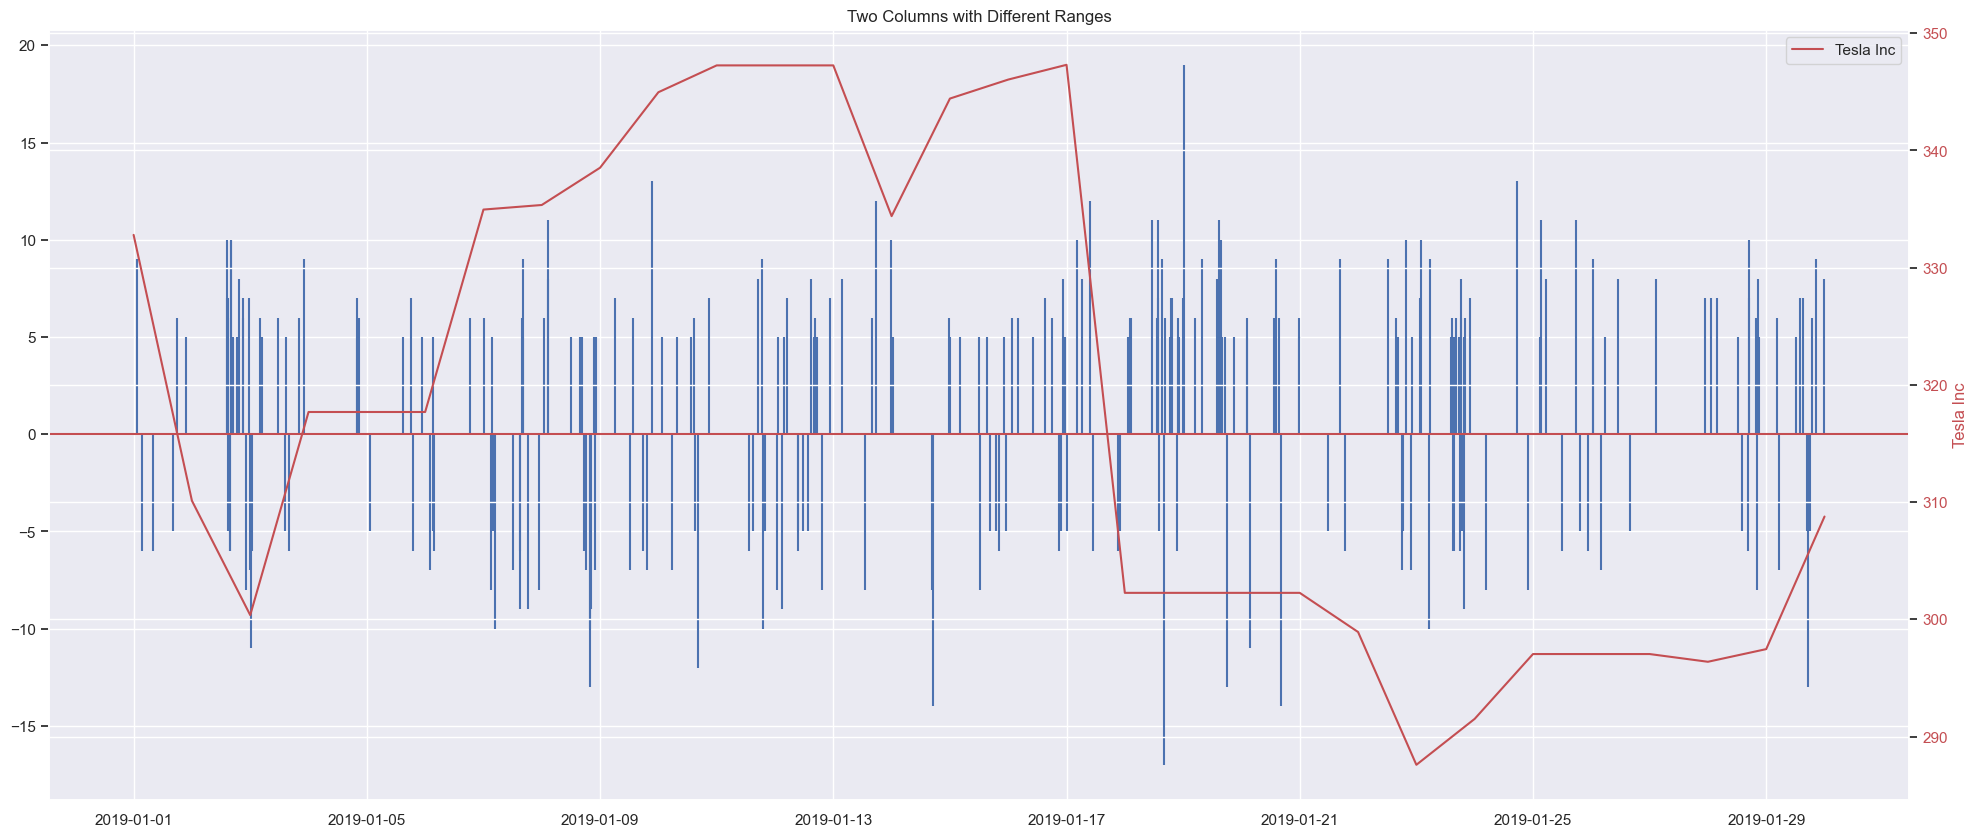

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





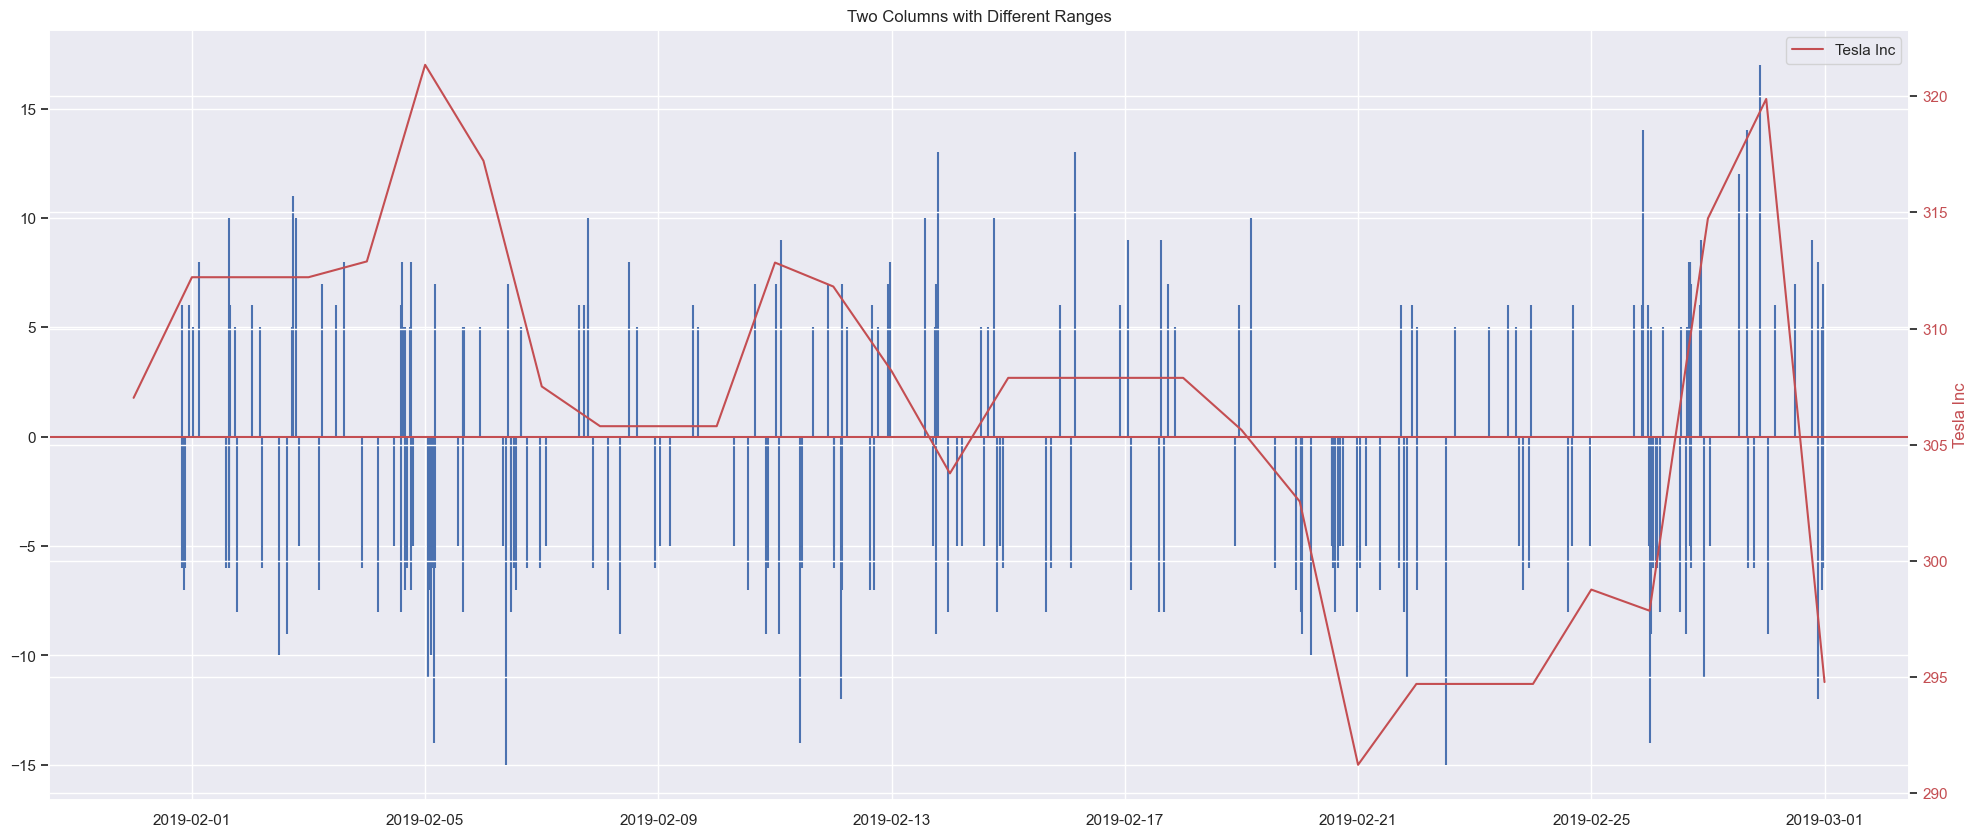

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





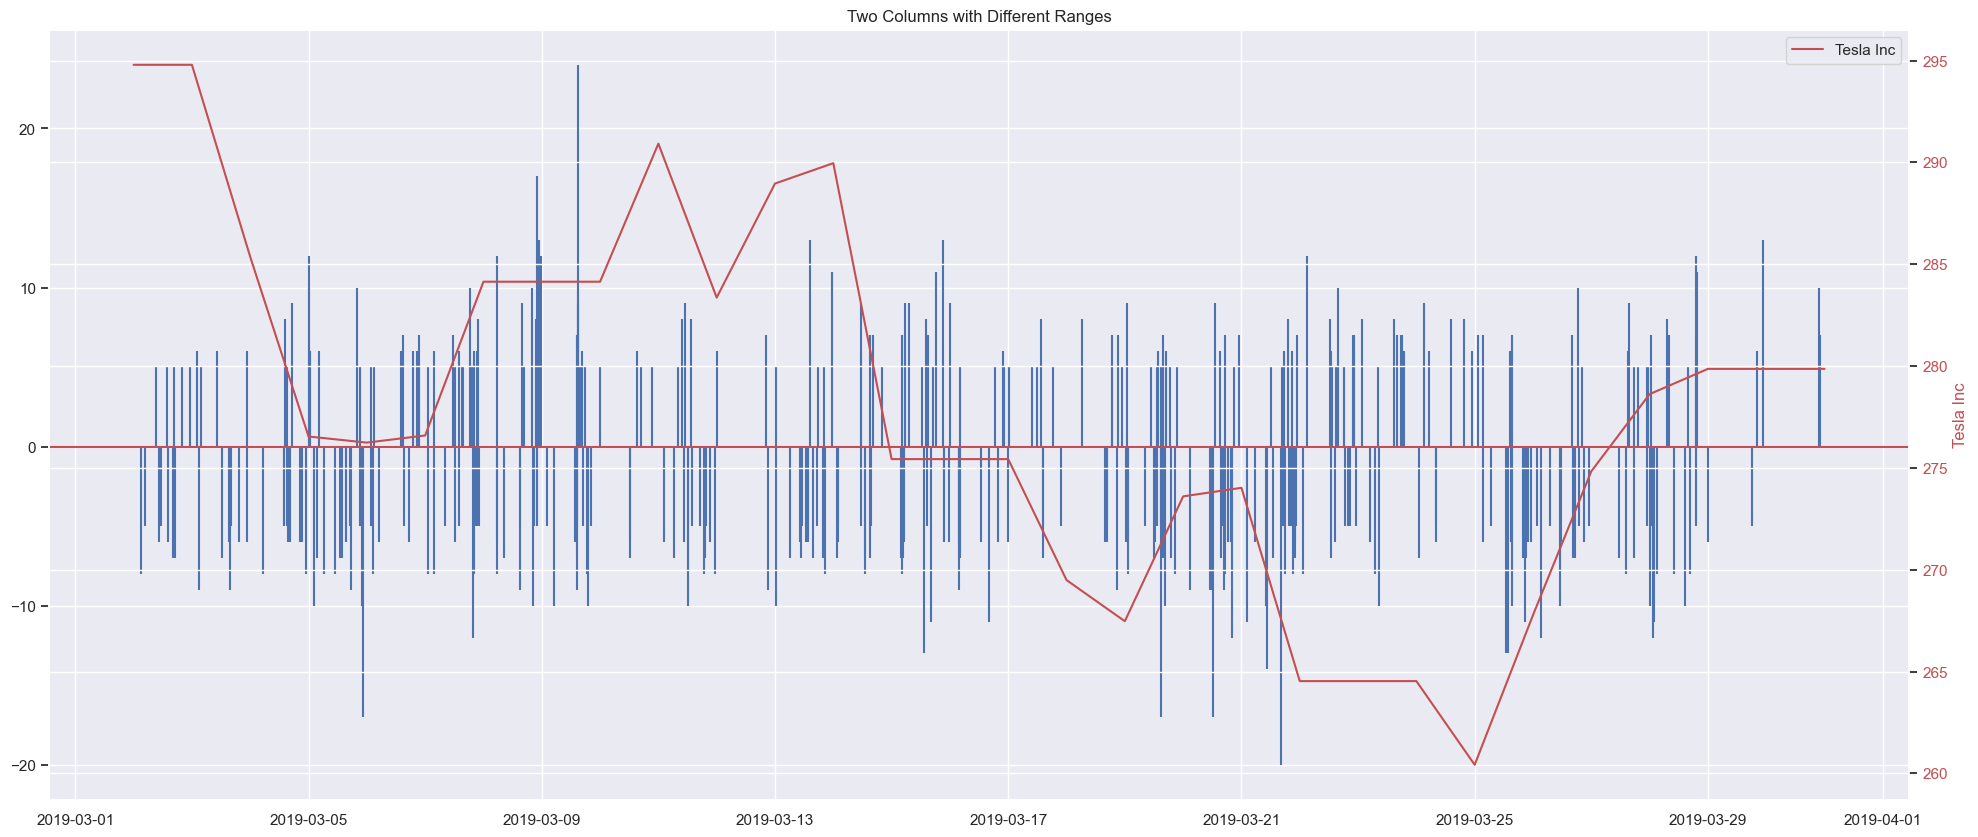

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





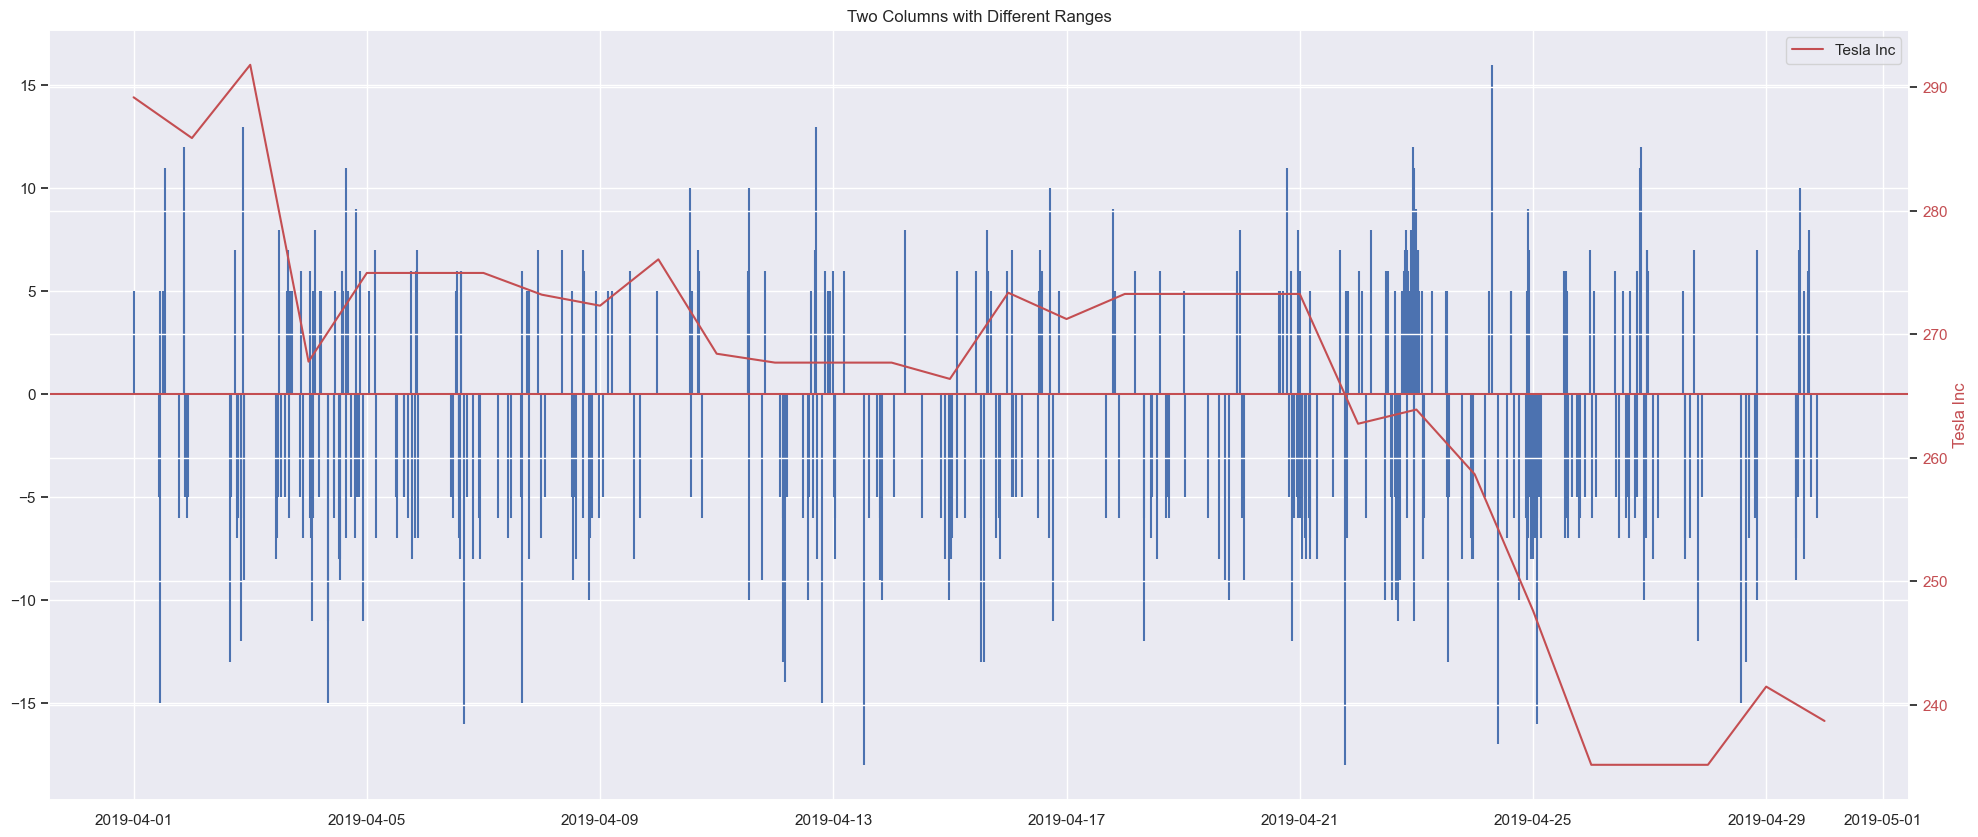

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





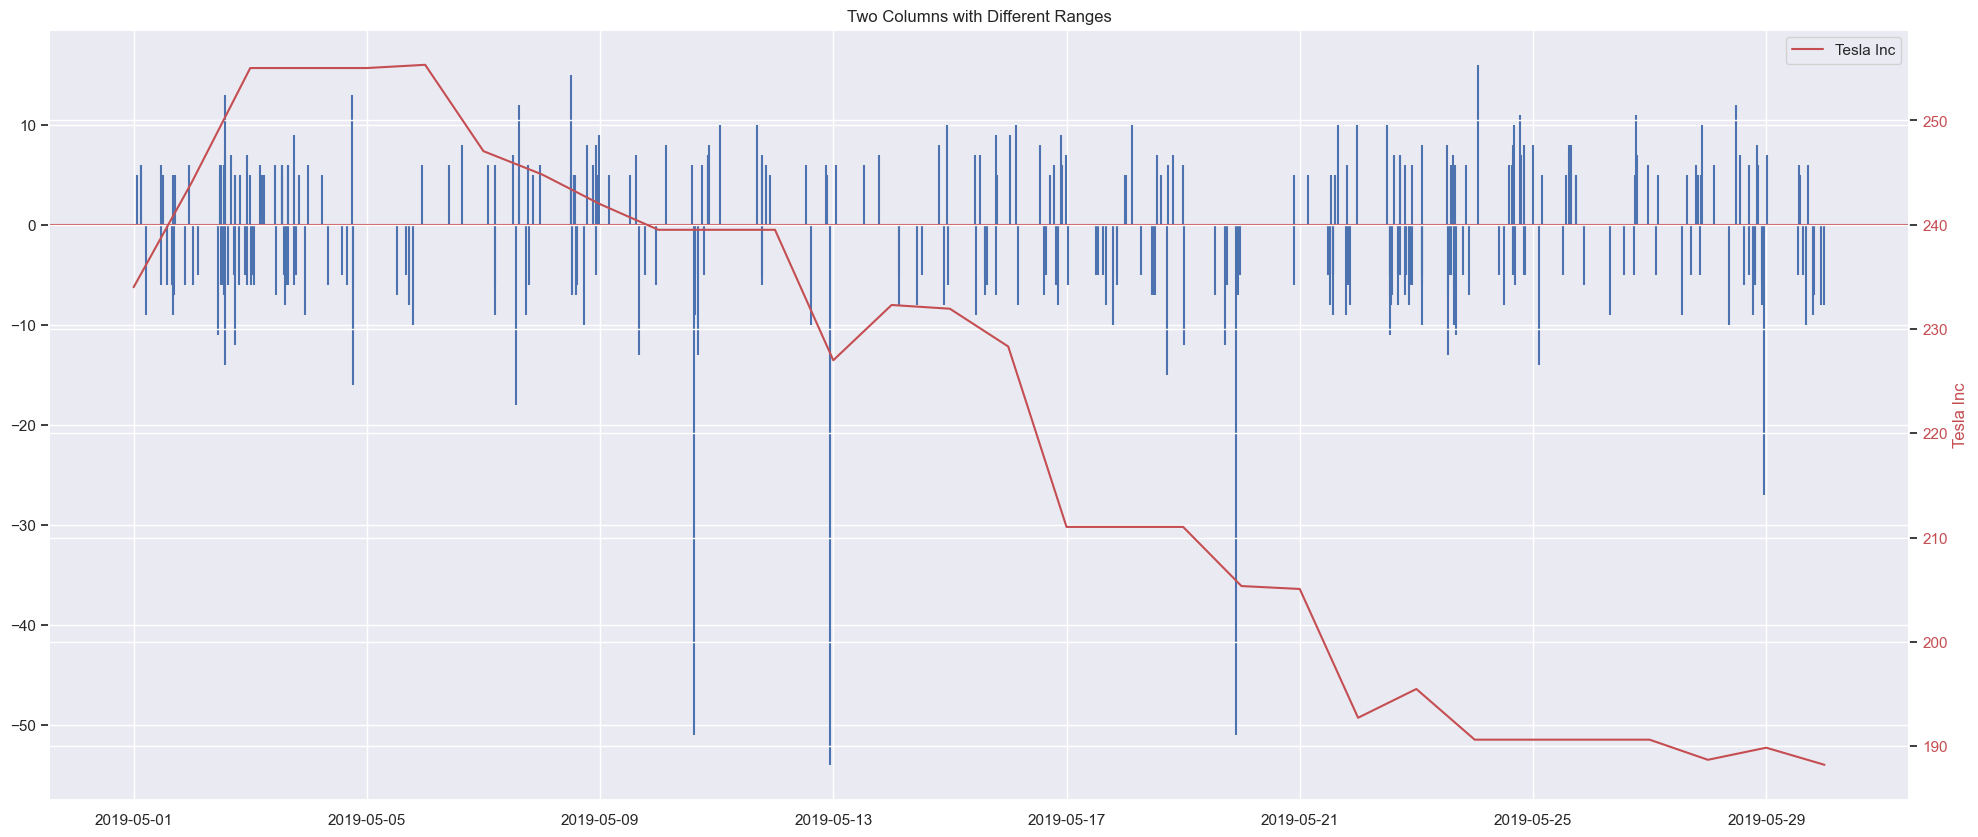

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





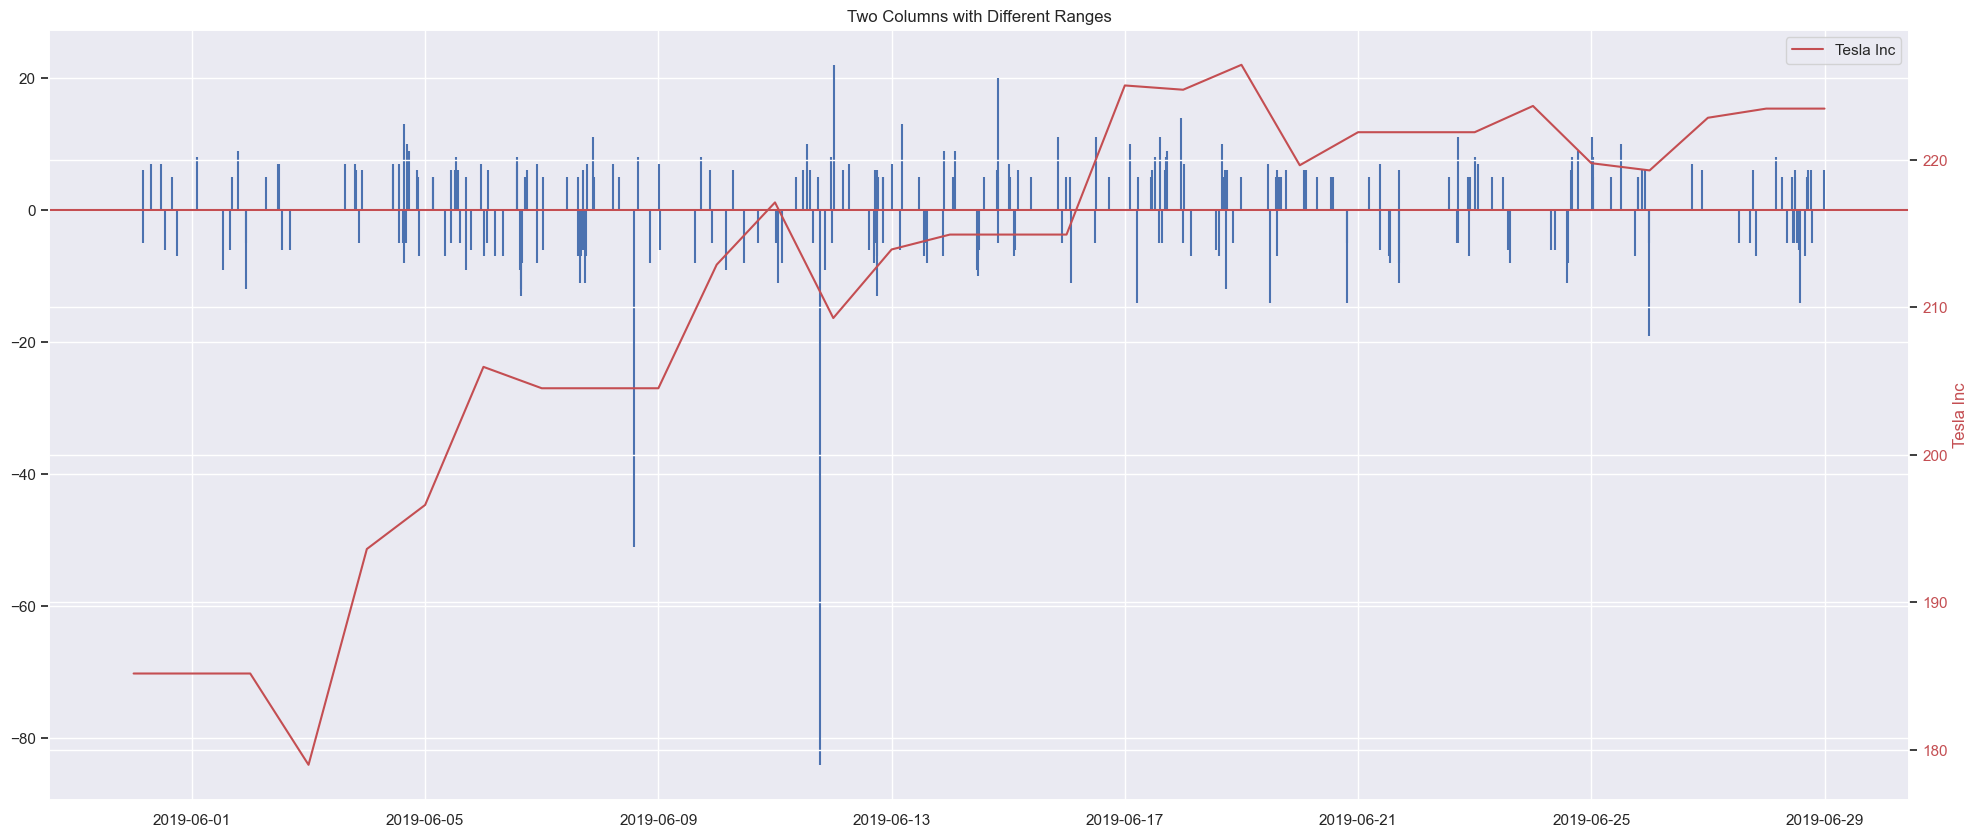

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





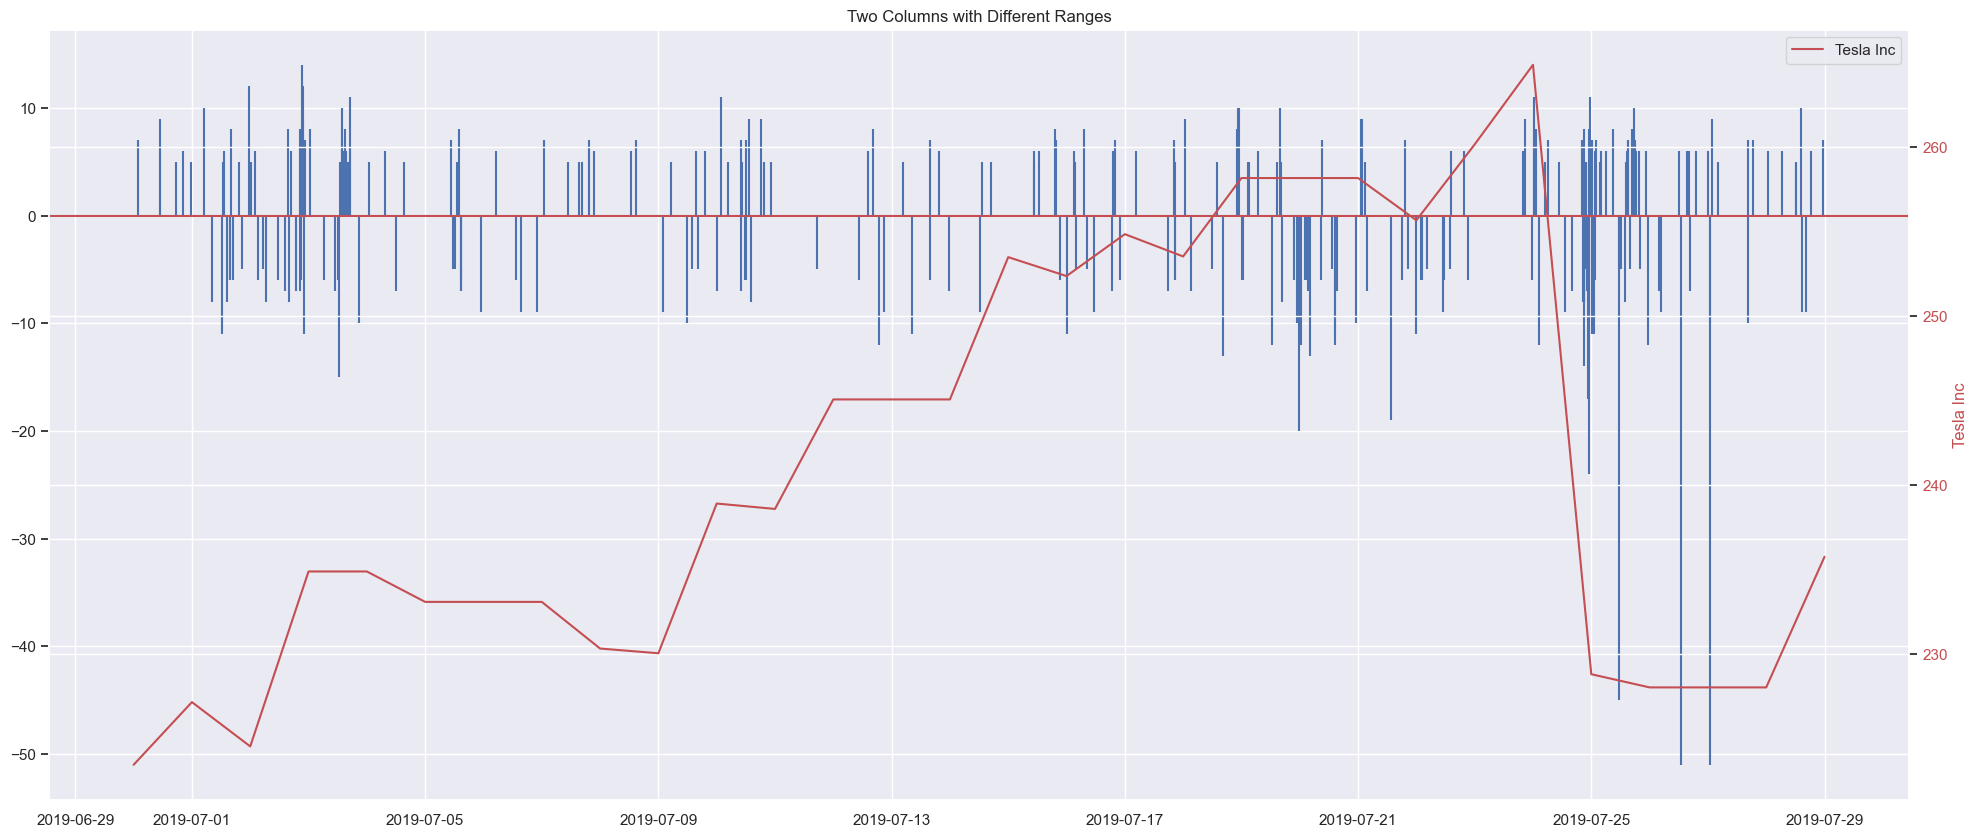

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





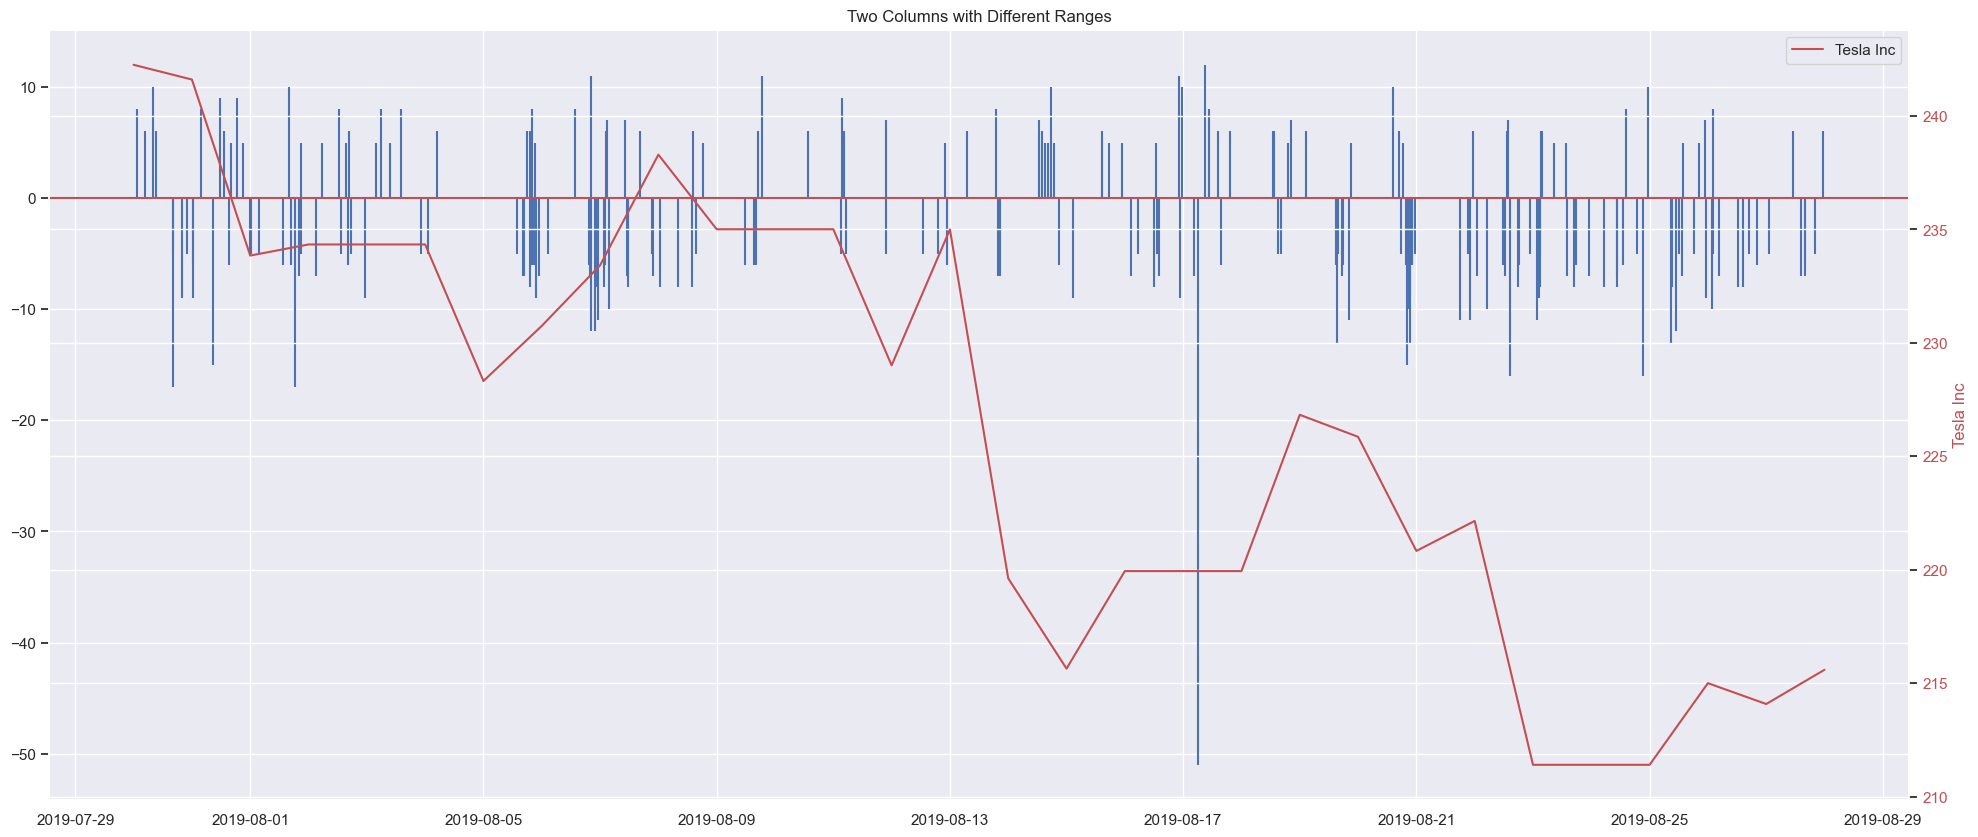

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





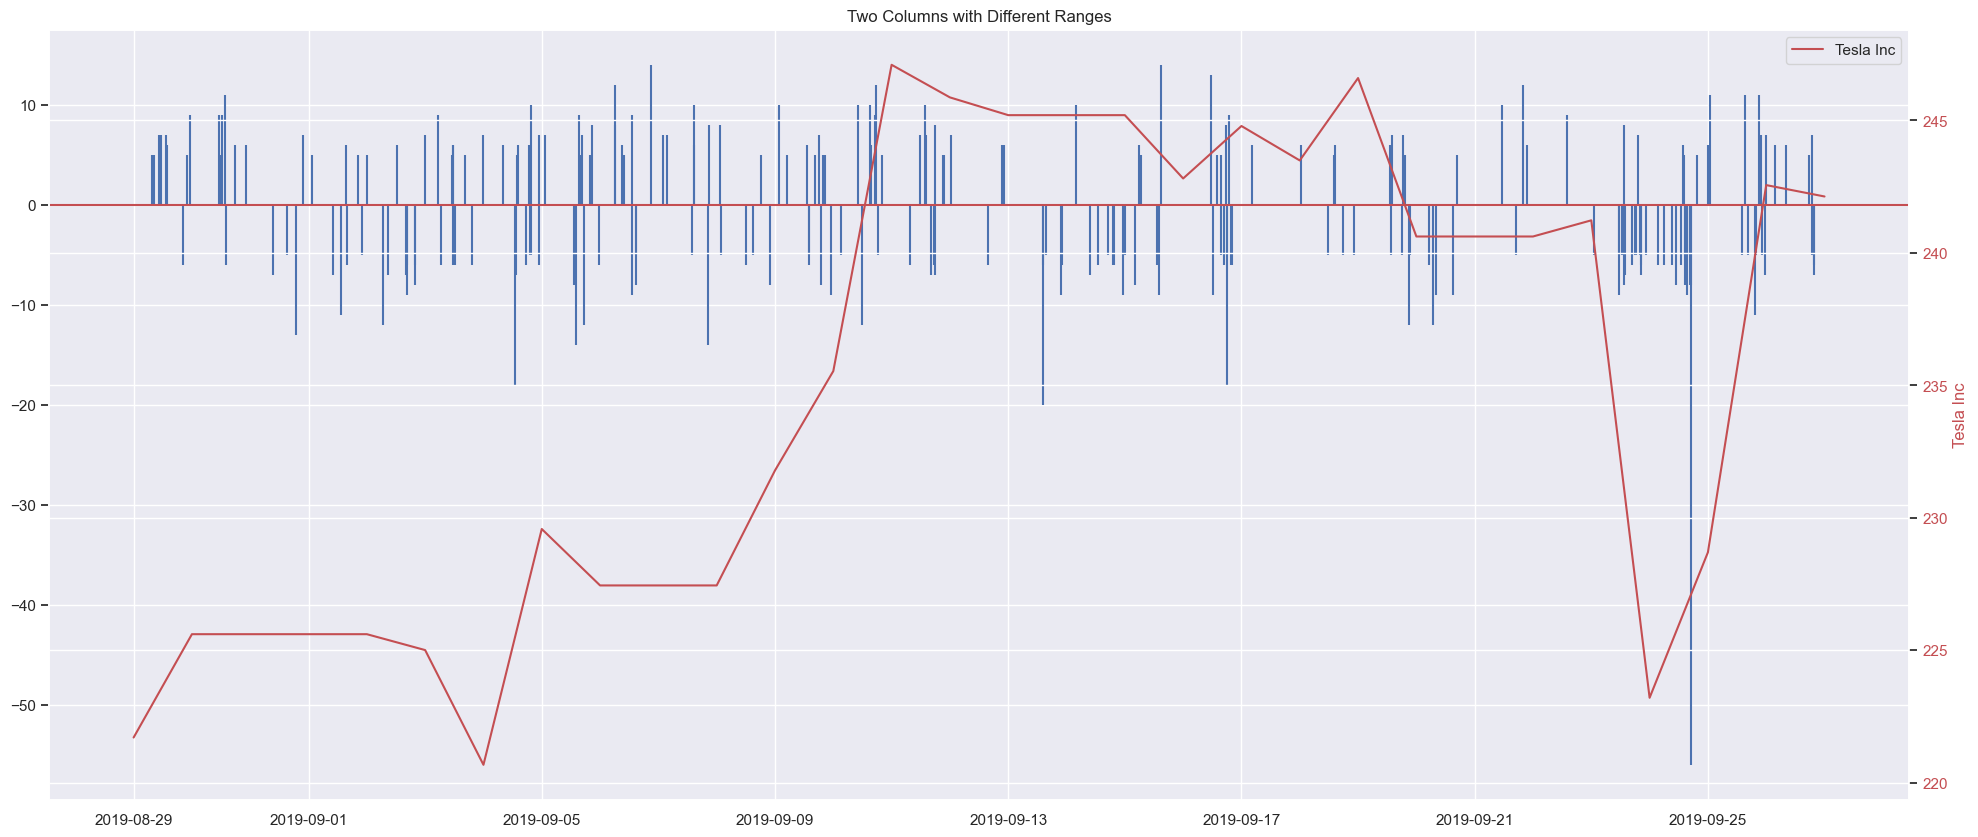

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





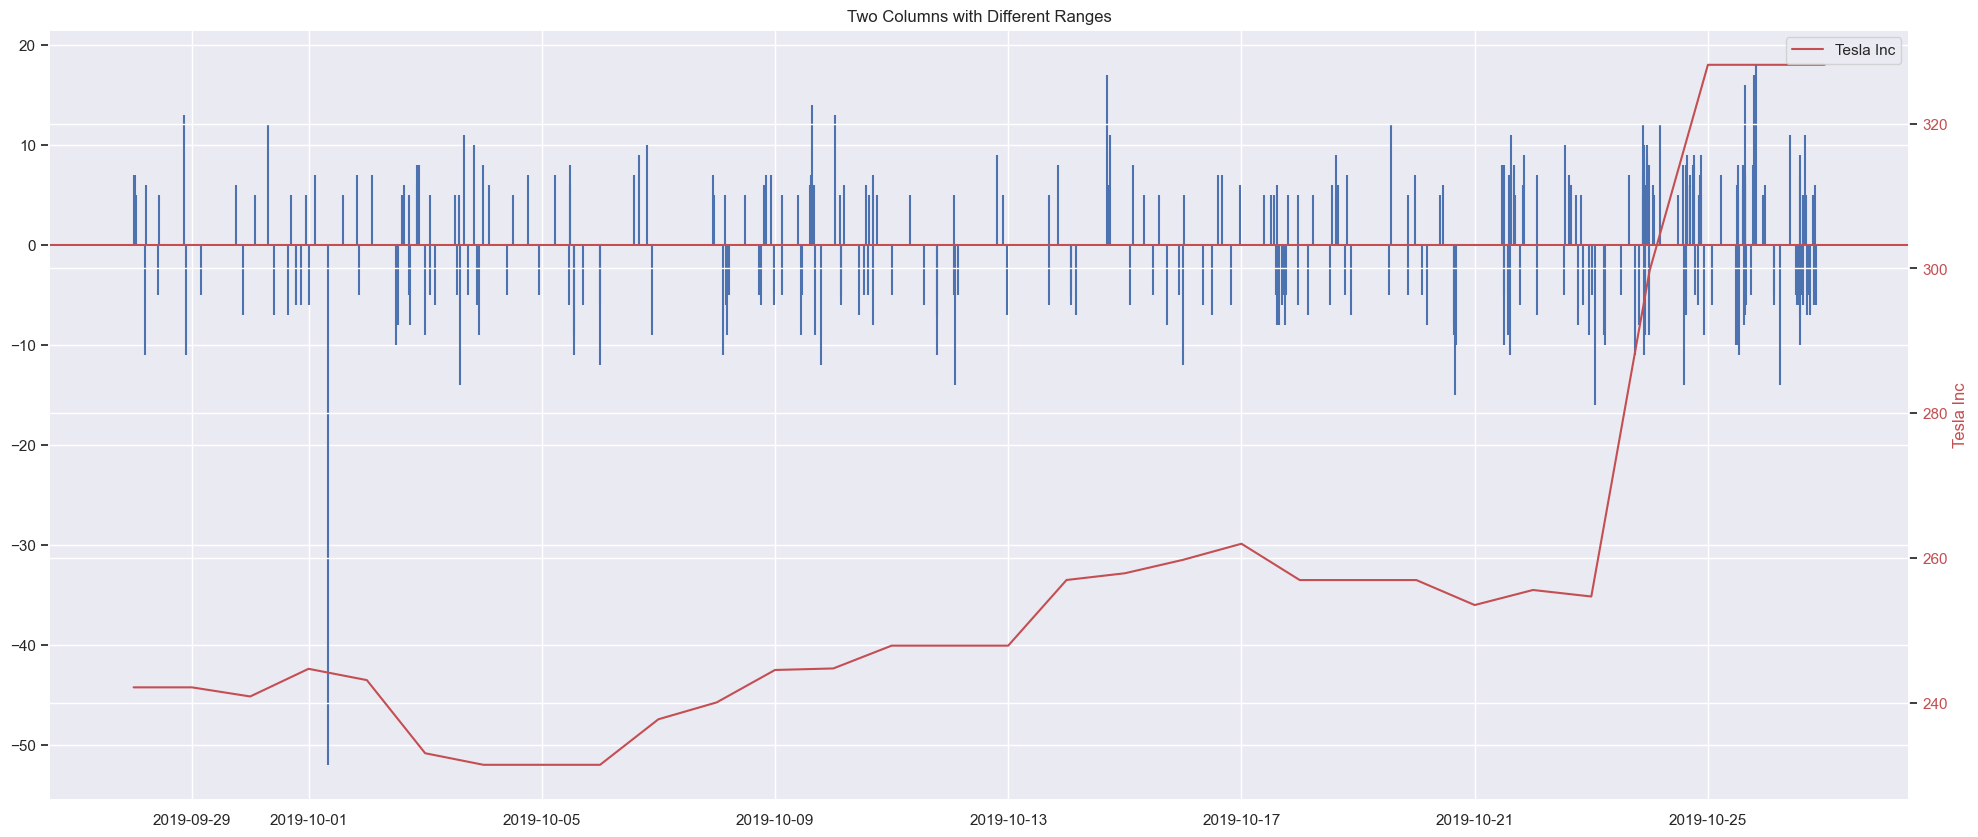

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





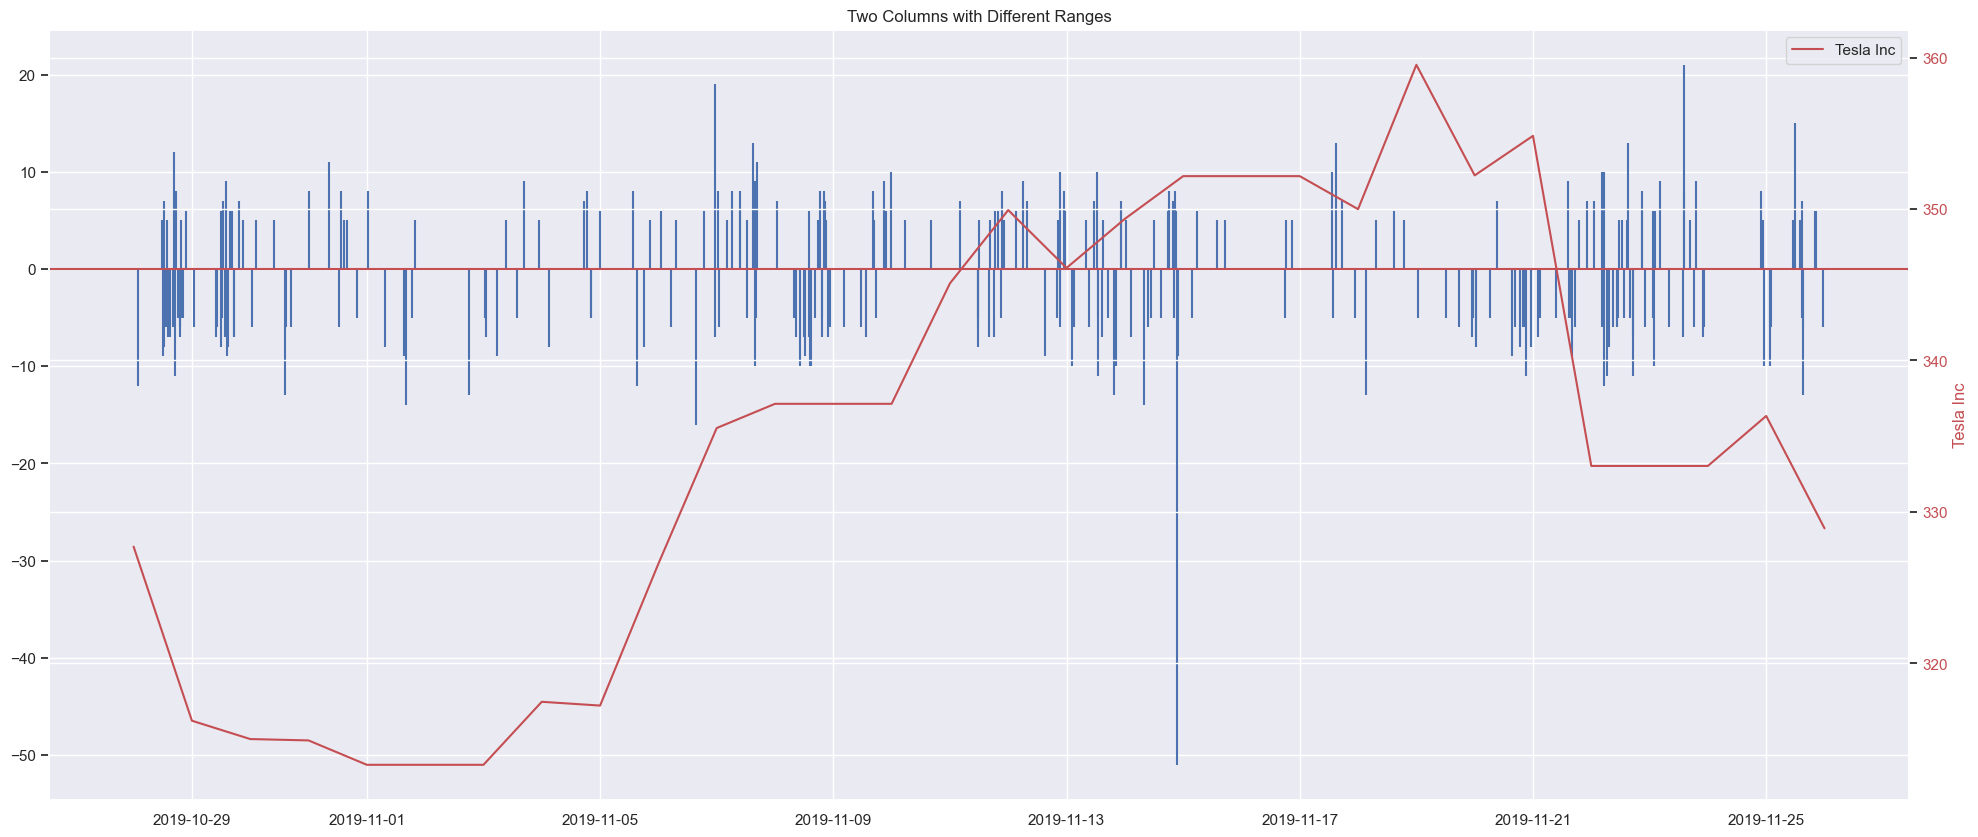

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





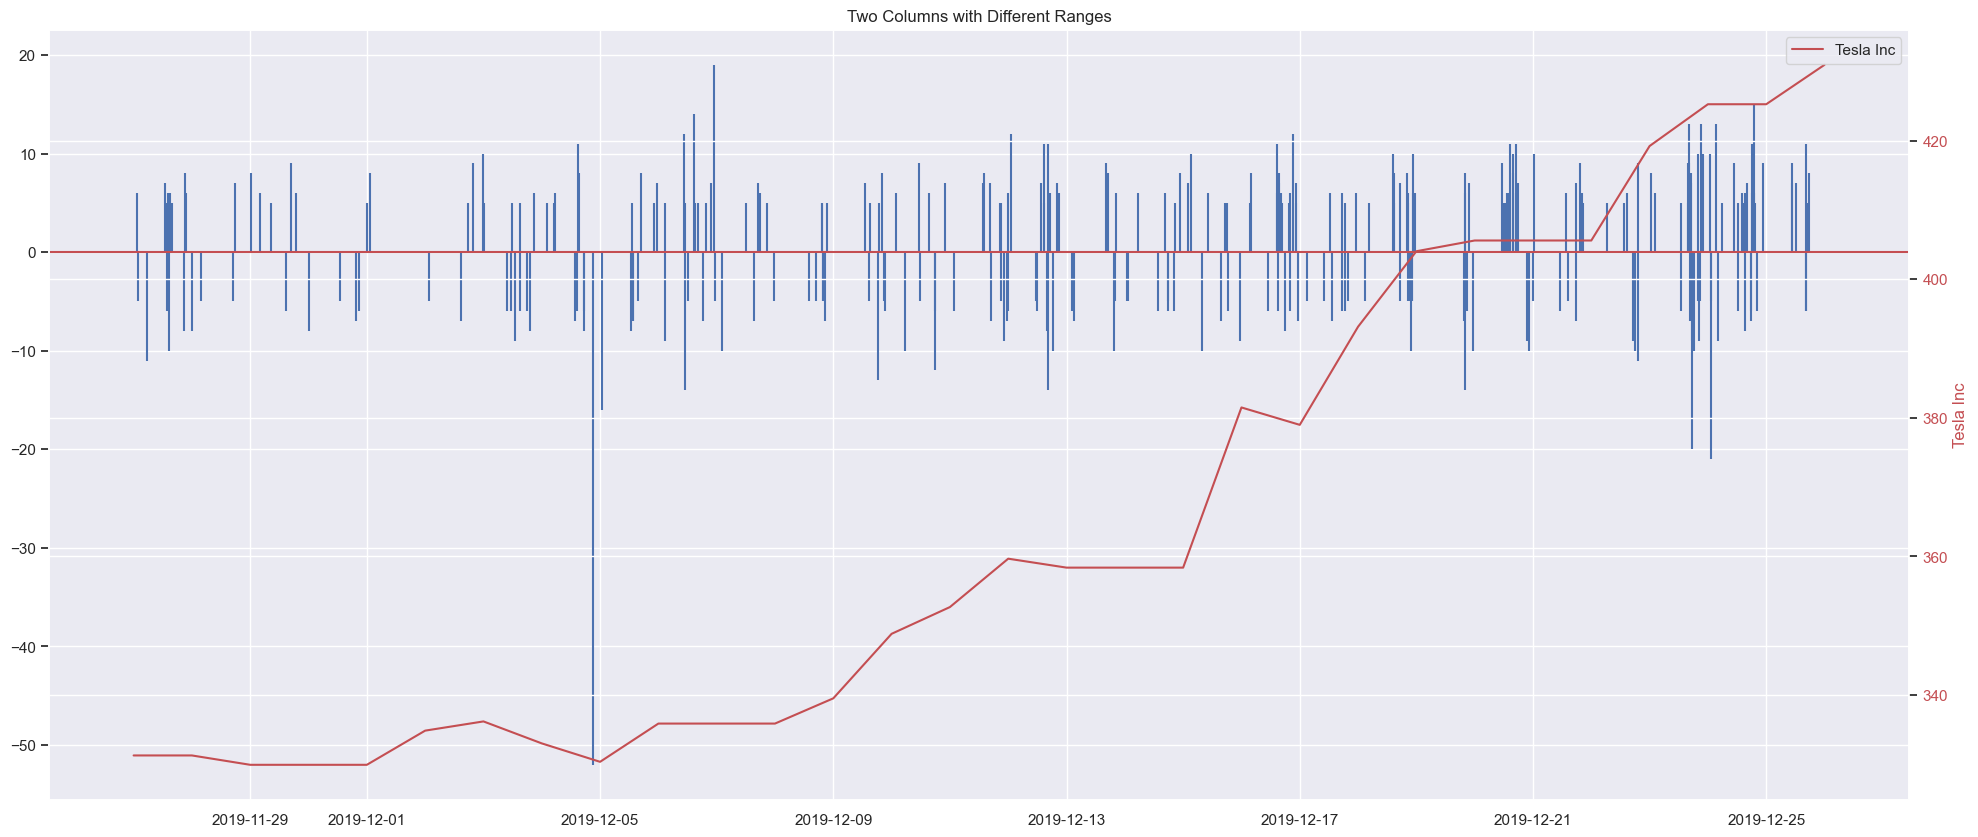

In [12]:
# Define the start and end dates
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)

# Initialize lists to store the start and end dates for every 3 months
start_dates = []
end_dates = []

# Define a timedelta of 3 months
delta = timedelta(days=30)

# Start the loop to generate dates
current_date = start_date

while current_date + delta - timedelta(days=1) <= end_date:
    # Add the current start date to the list
    start_dates.append(current_date)
    
    # Calculate the end date by adding 2 months and 30 days to the current date
    end_dates.append(current_date + delta - timedelta(days=1))
    
    # Move the current date forward by 3 months
    current_date += delta

for i in range(len(start_dates)):
    score_threshold = 5
    tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
    draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_dates[i], end_dates[i], score_name="afinn_score")

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





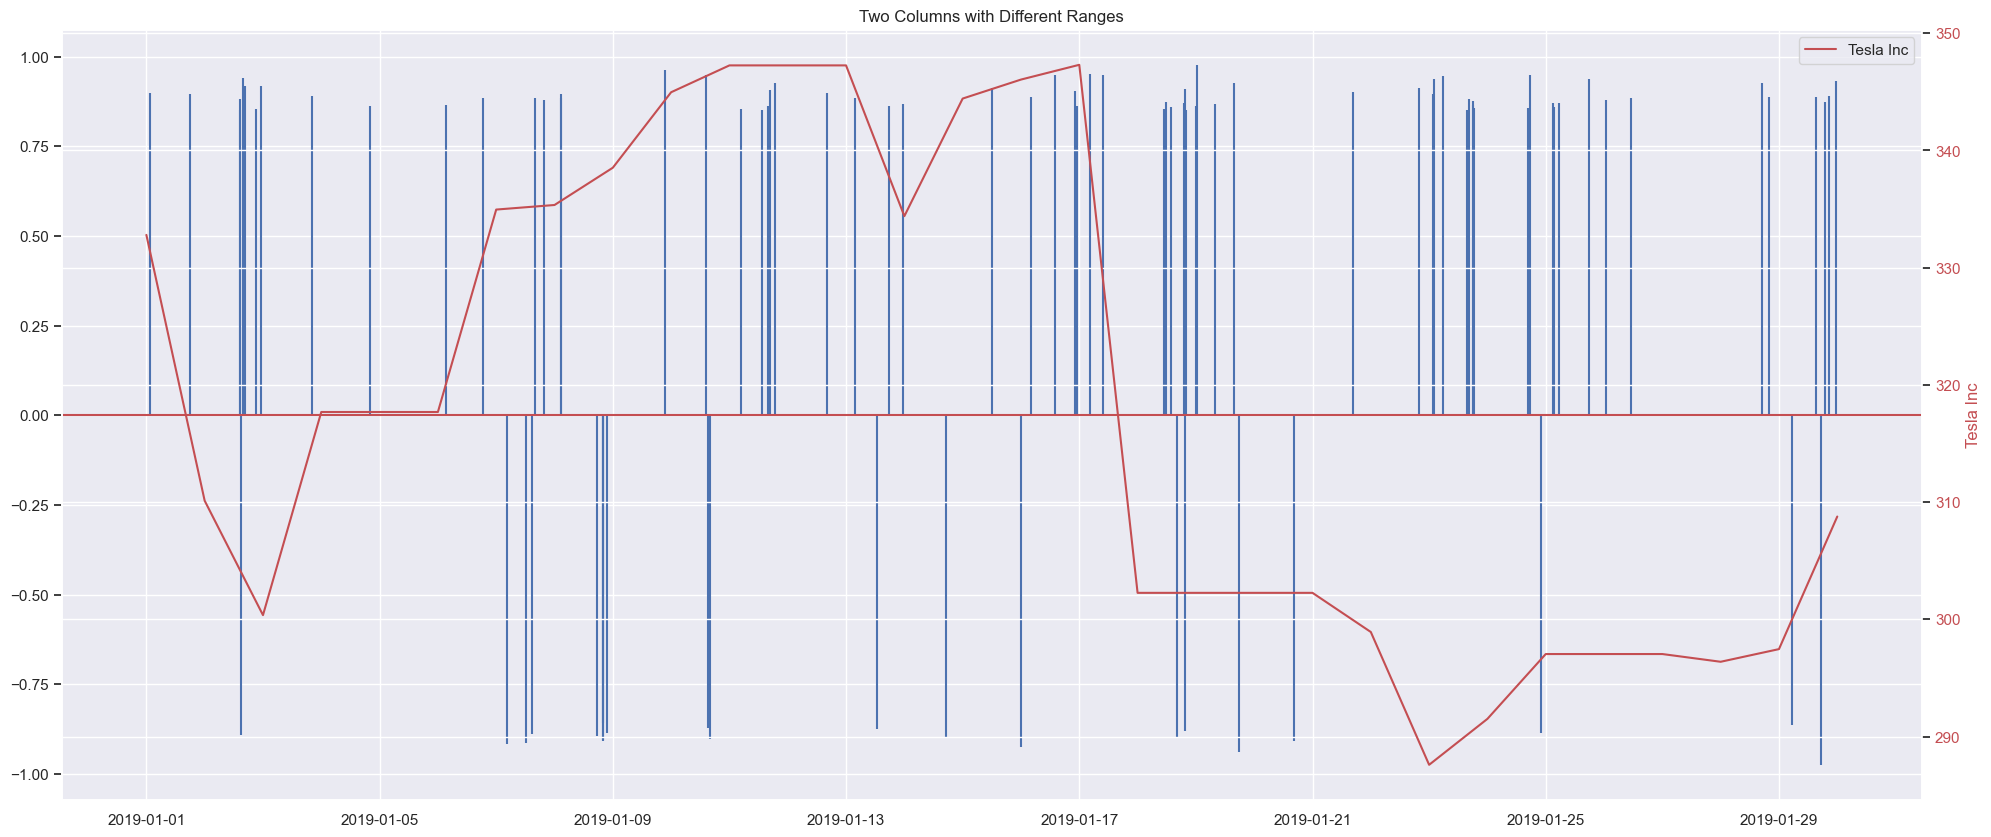

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





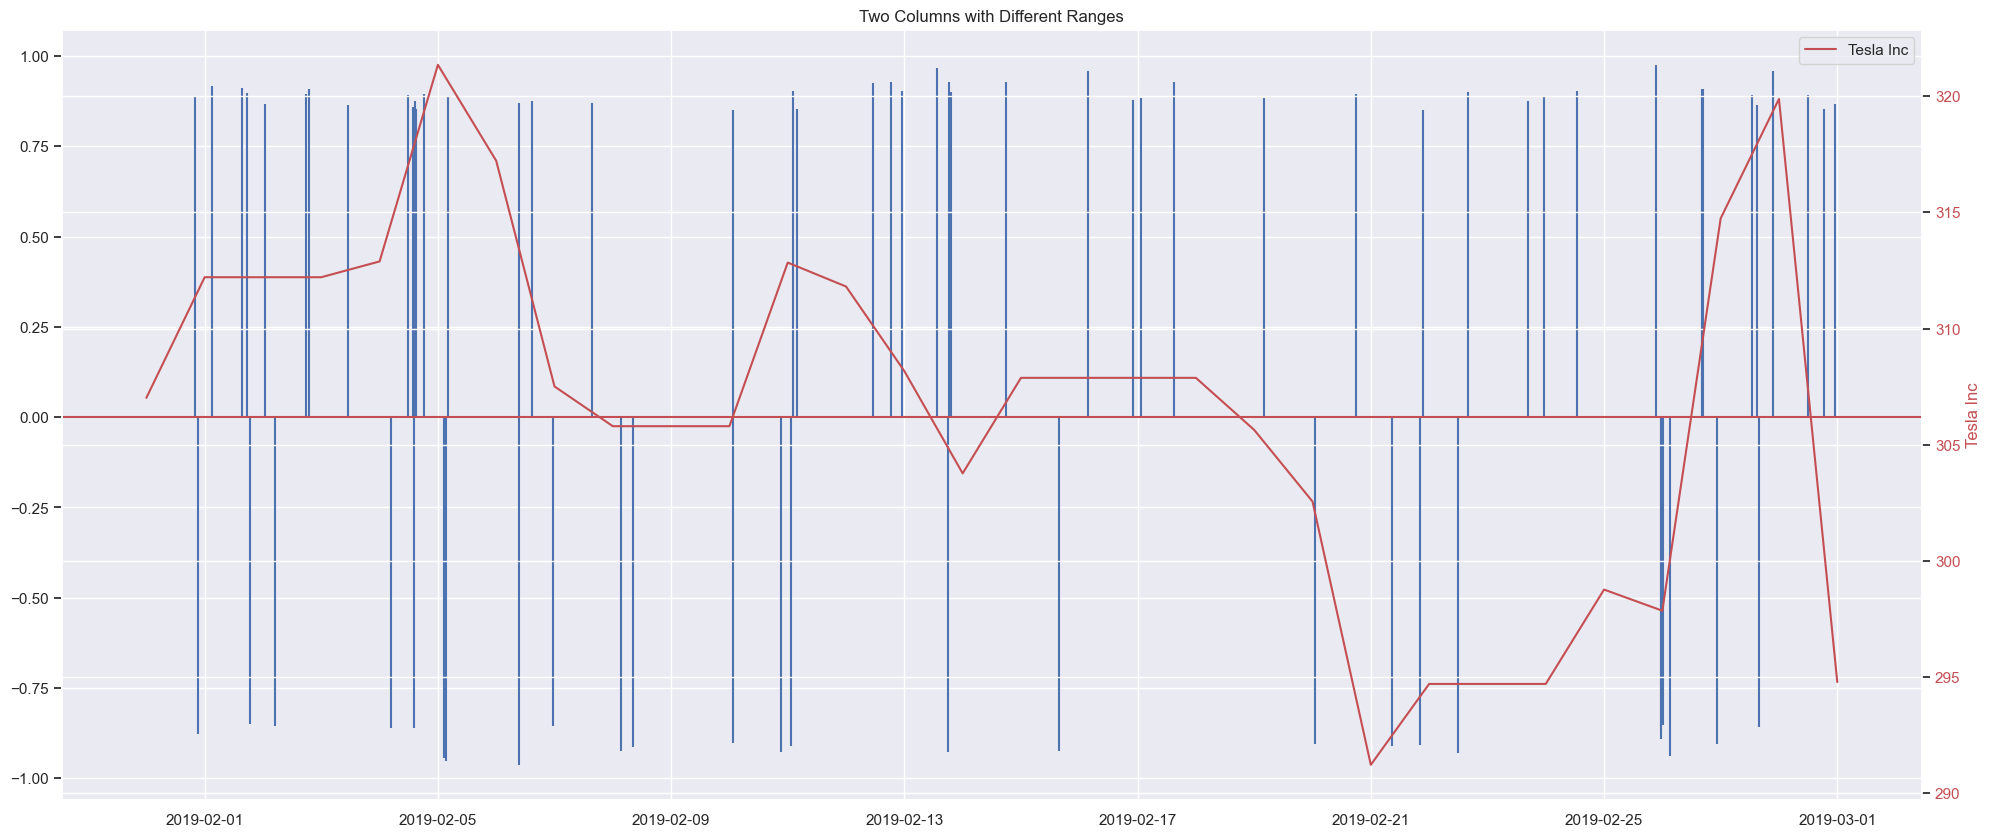

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





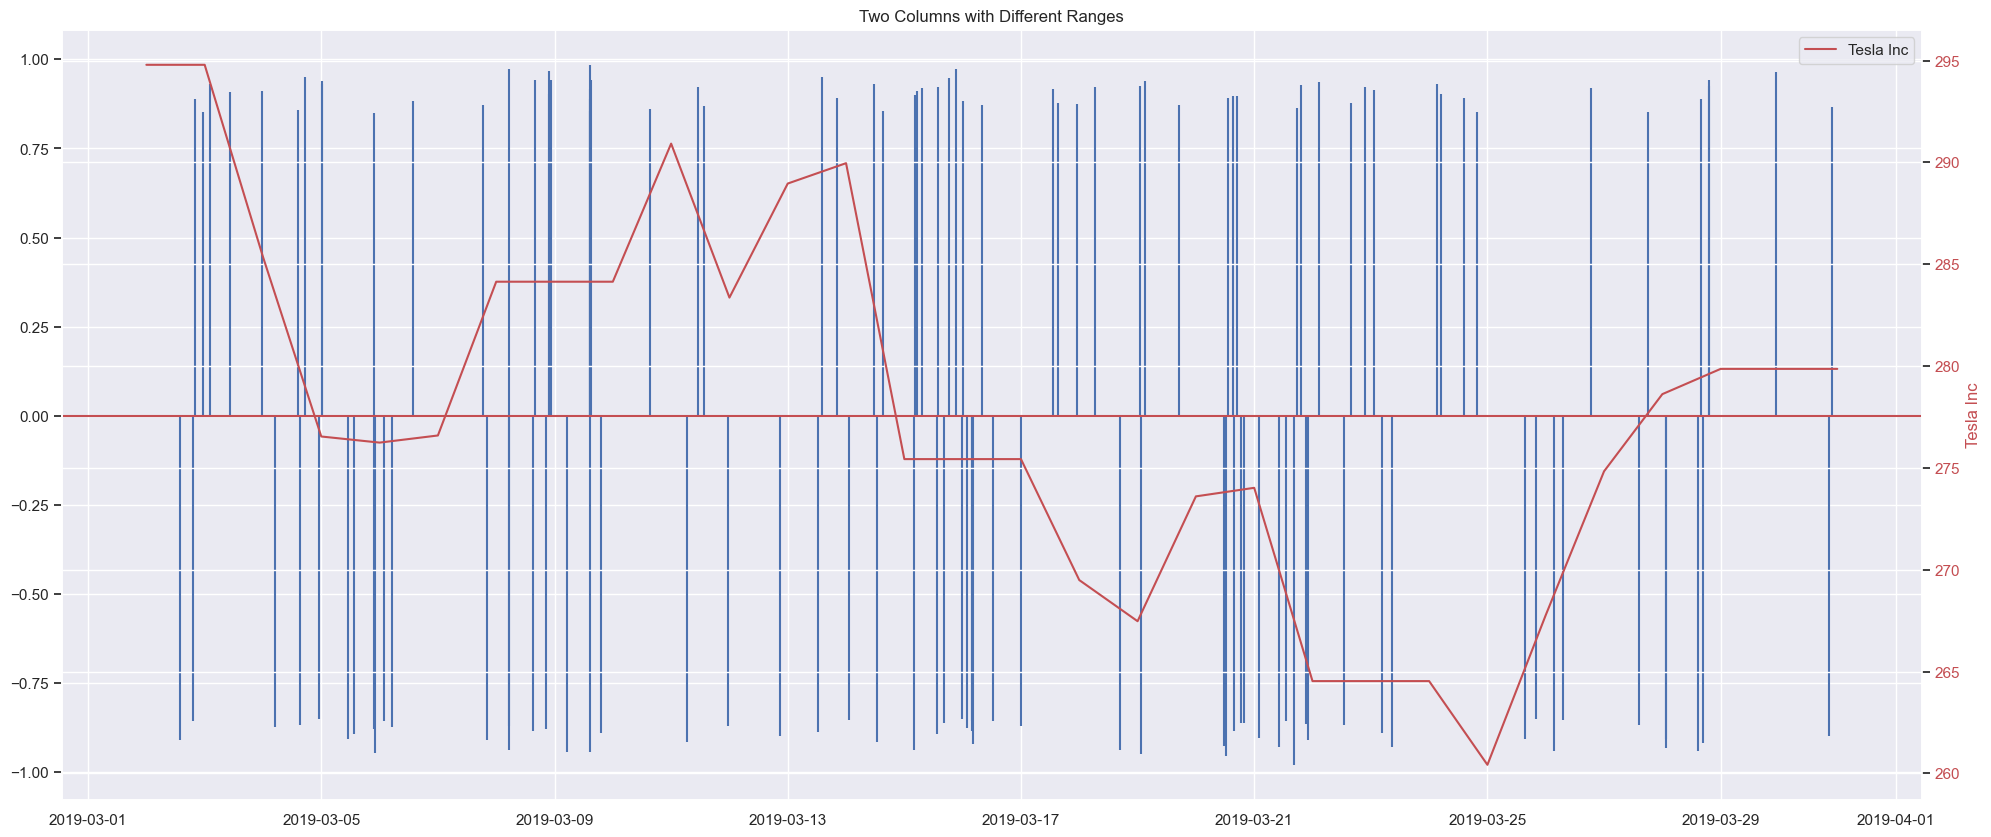

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





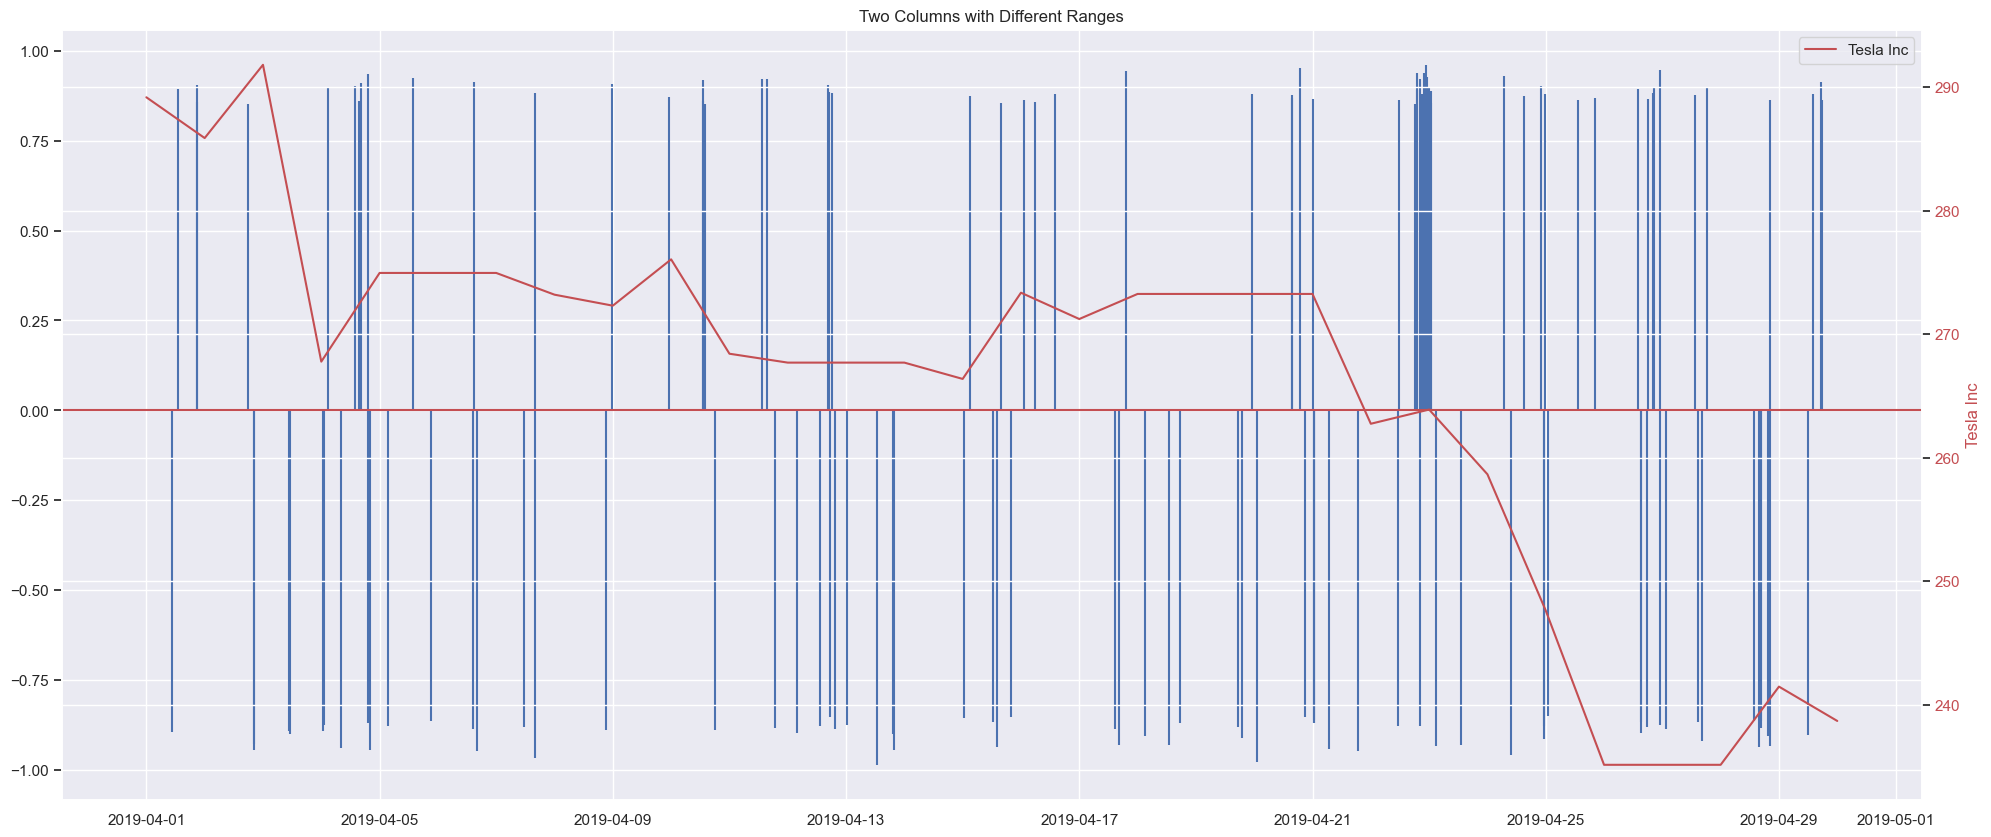

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





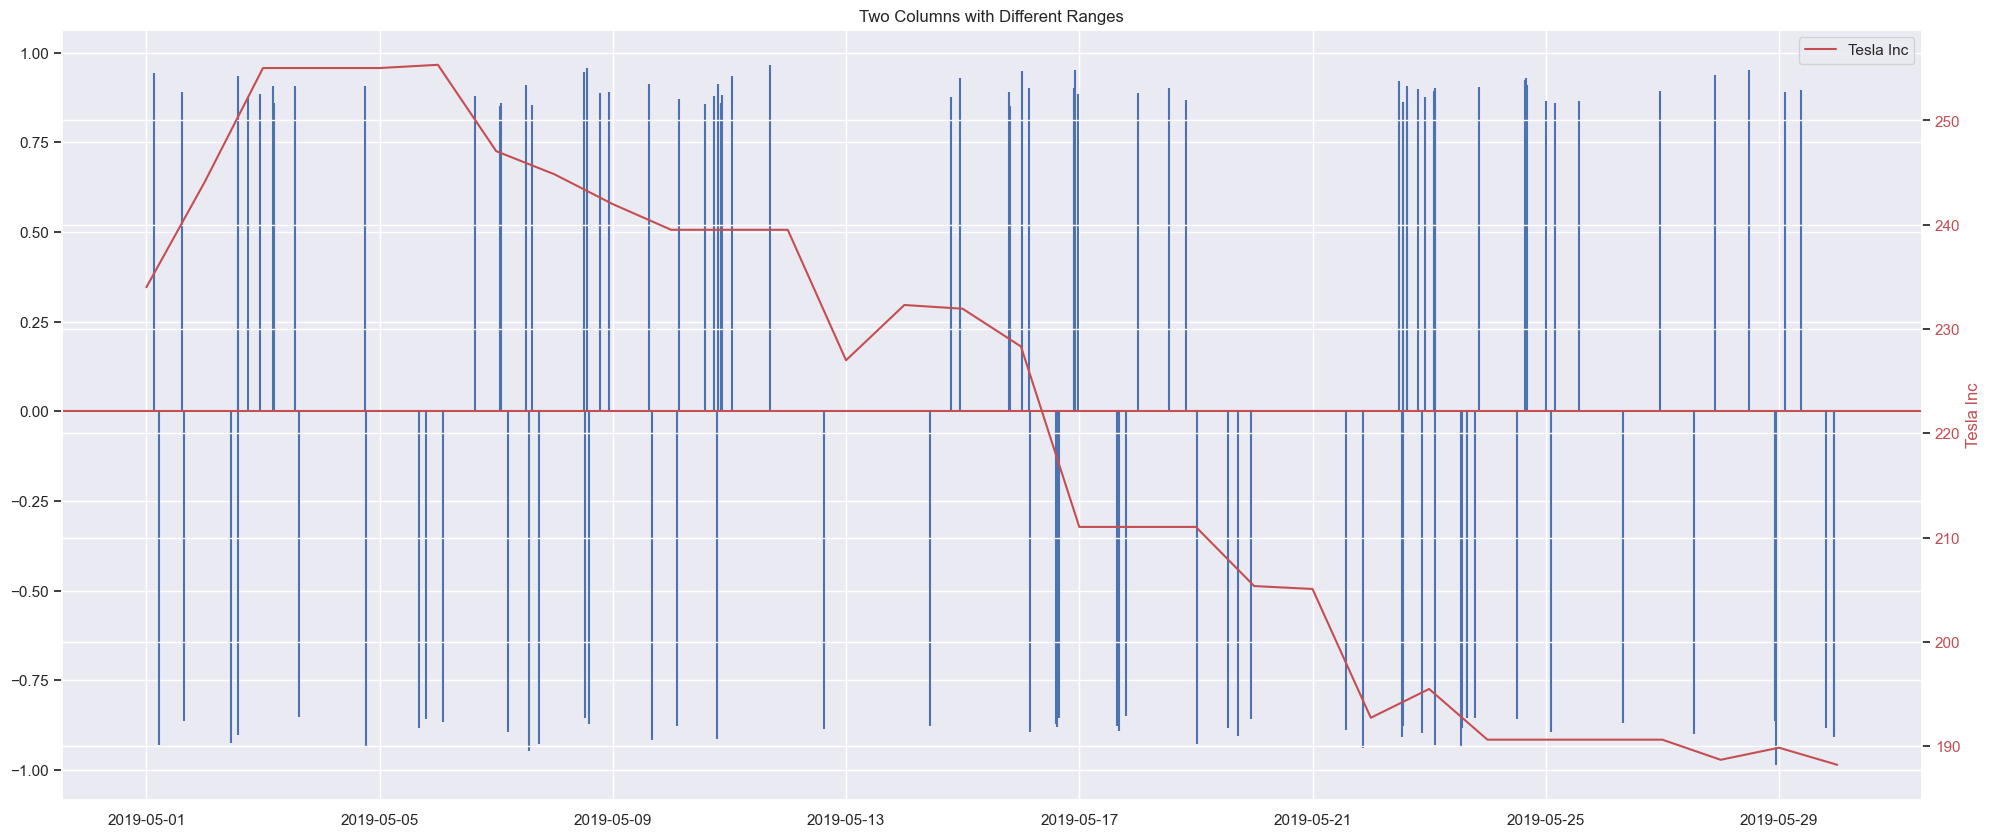

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





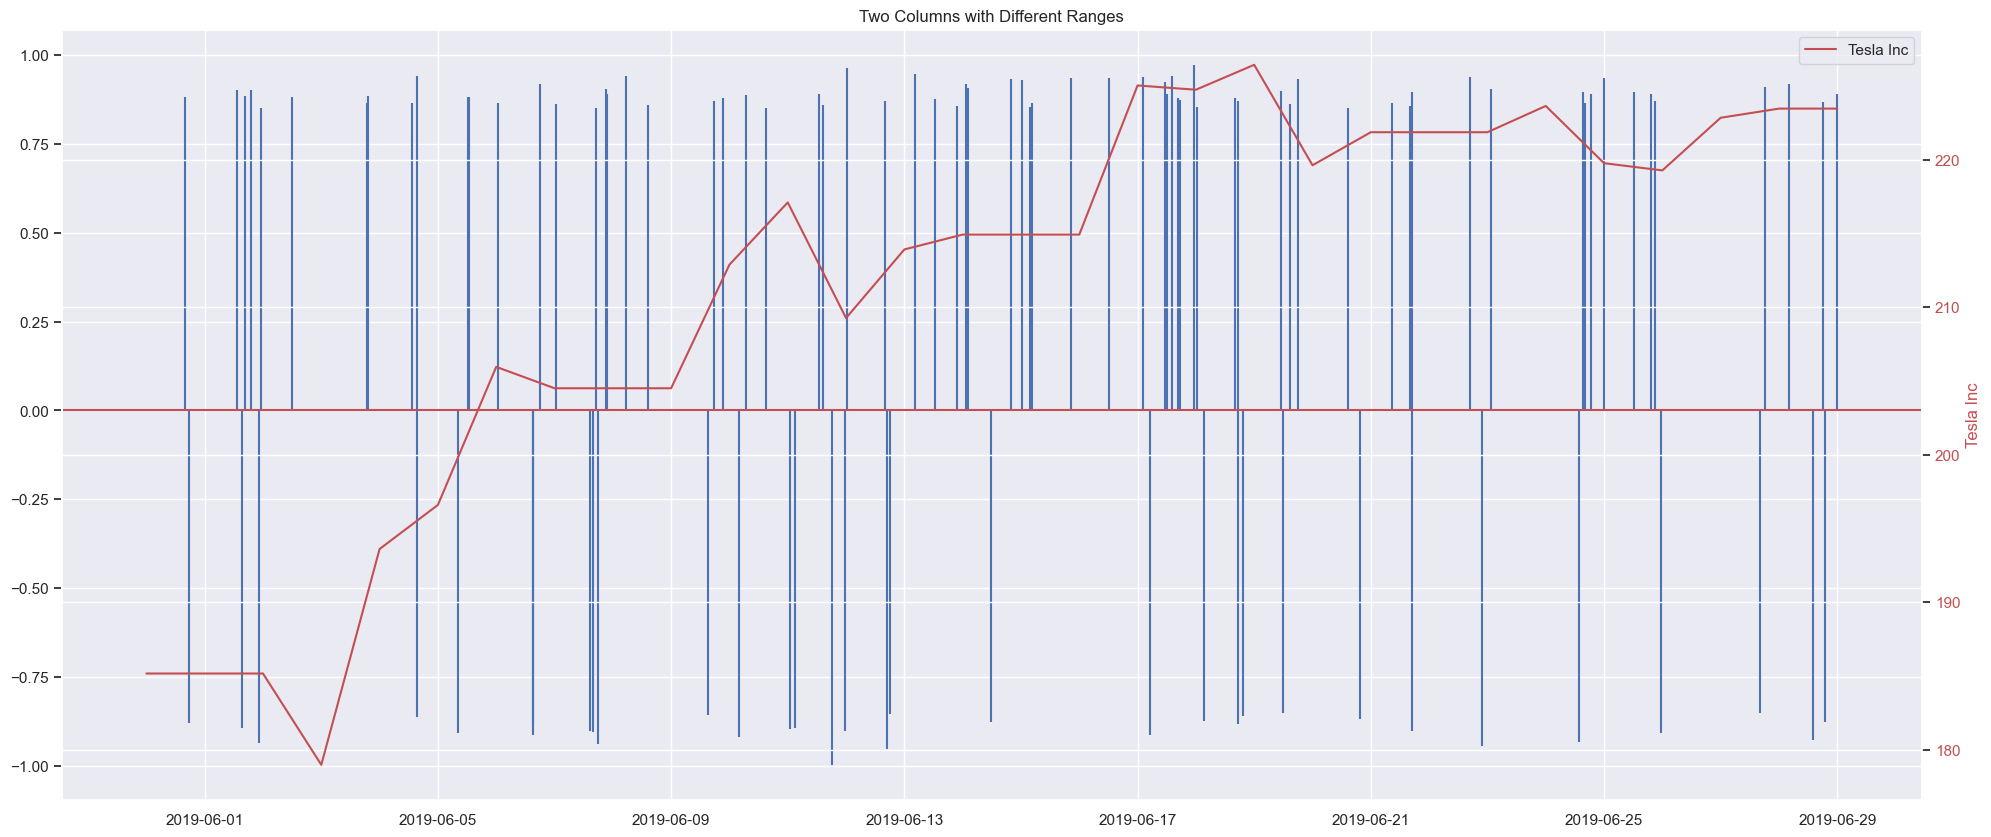

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





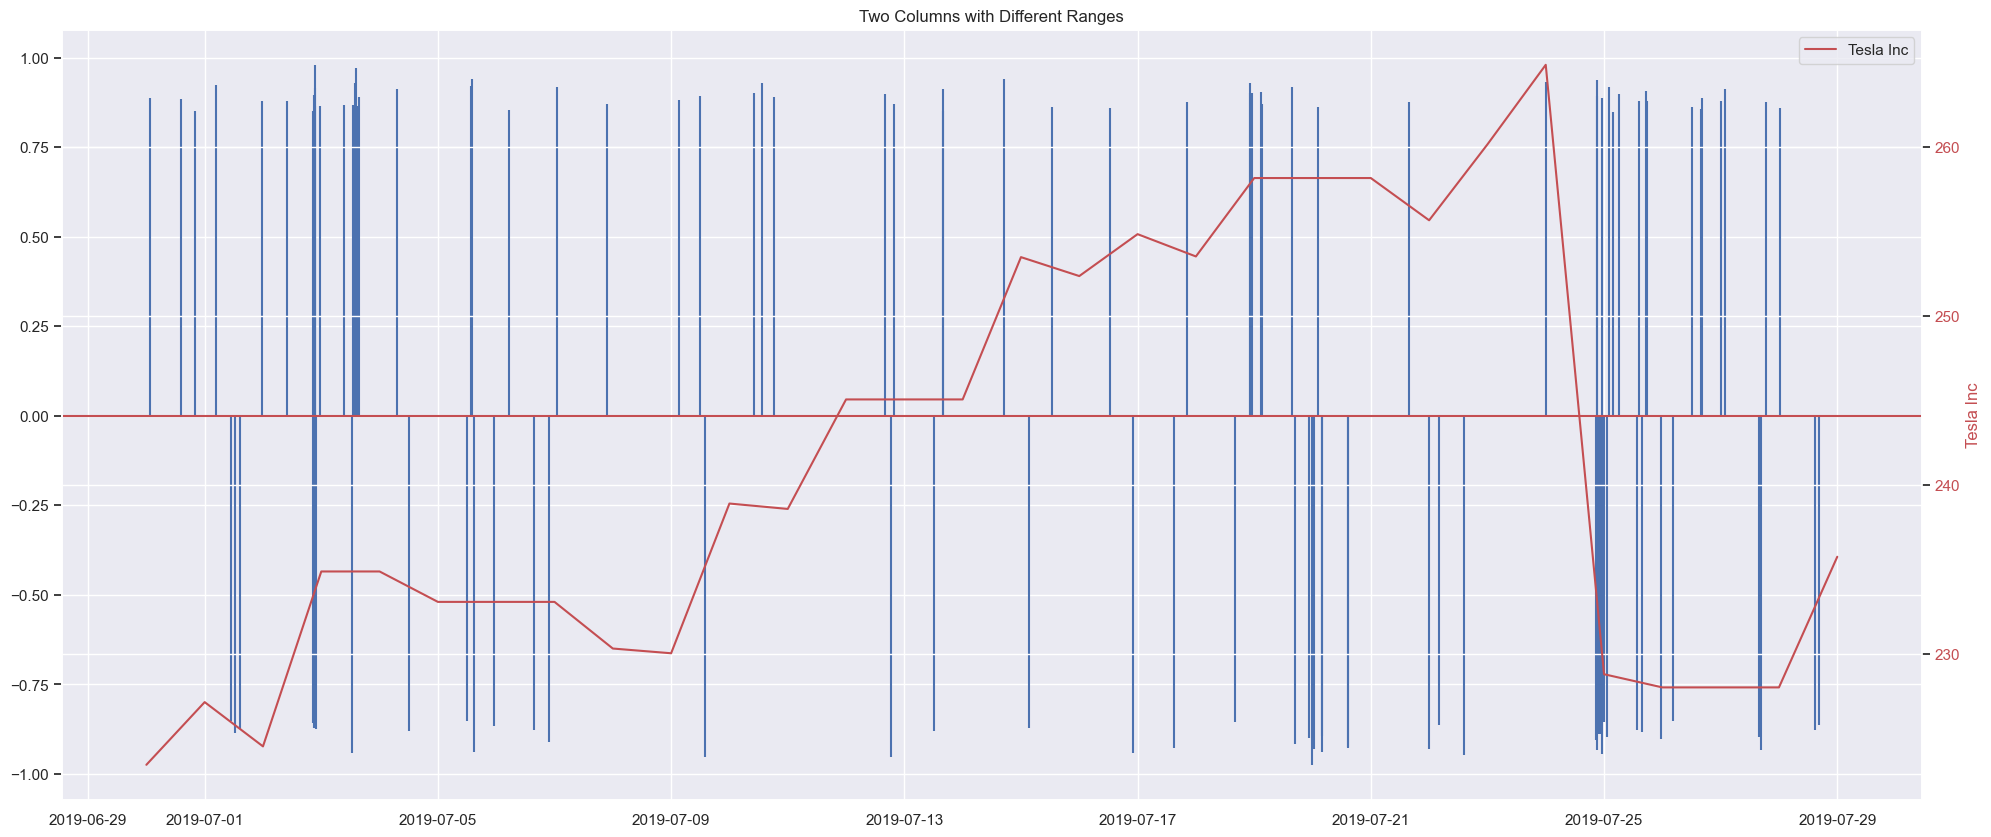

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





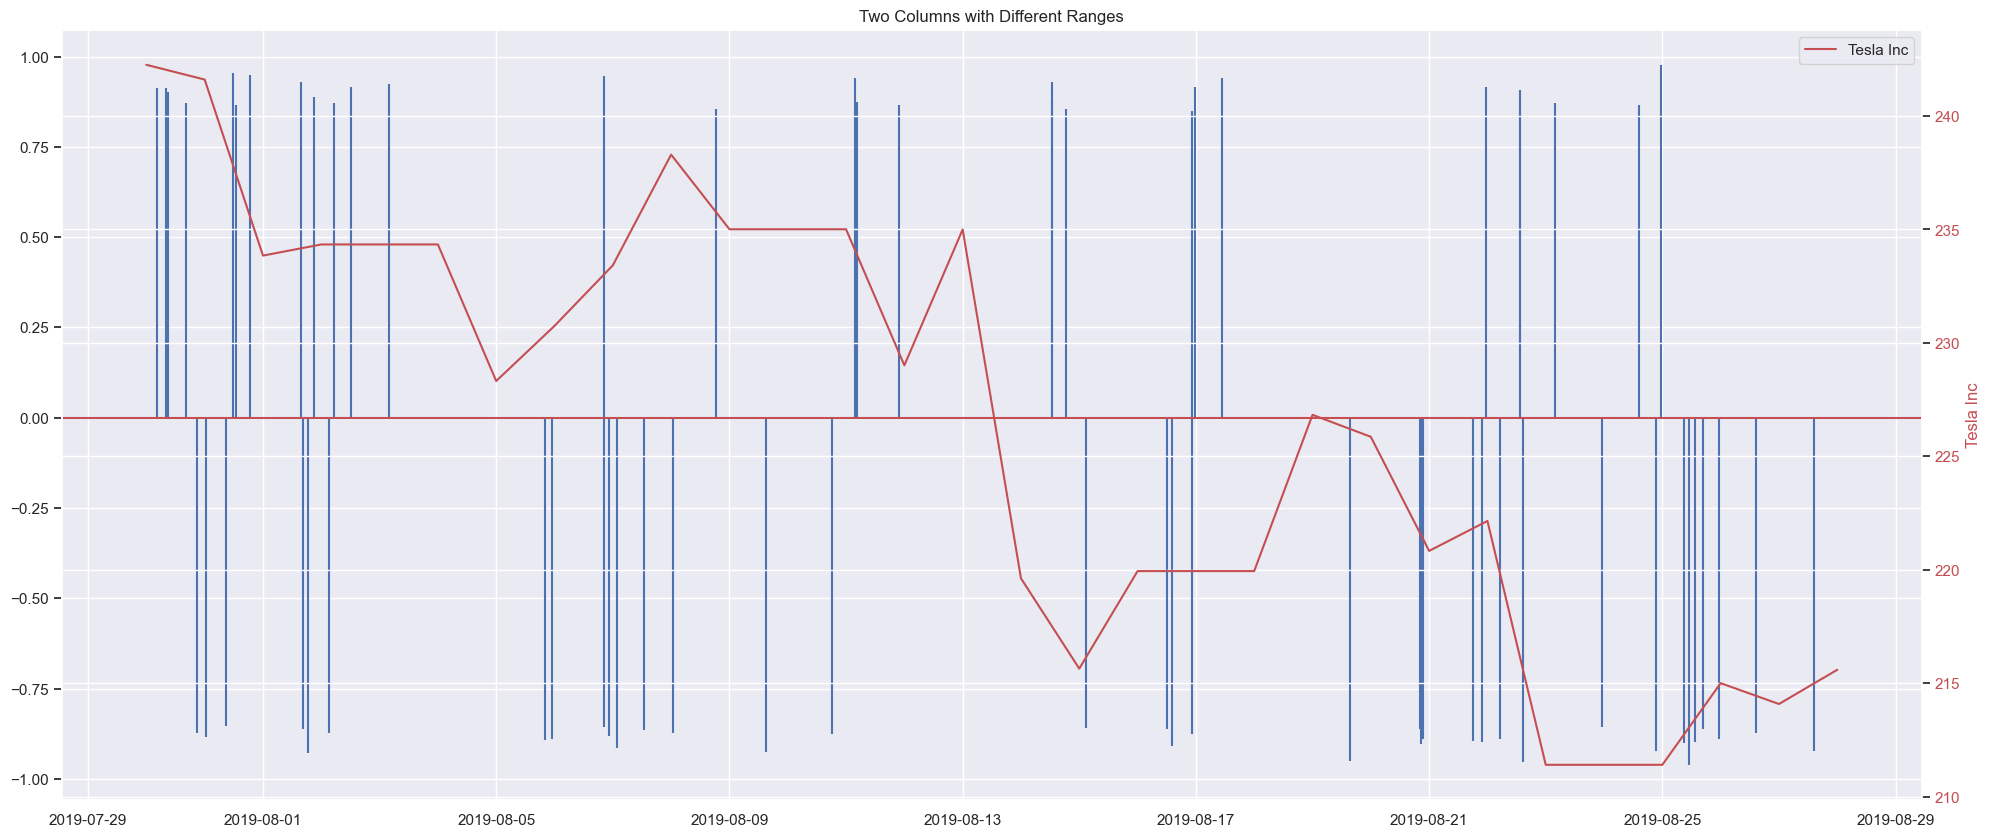

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





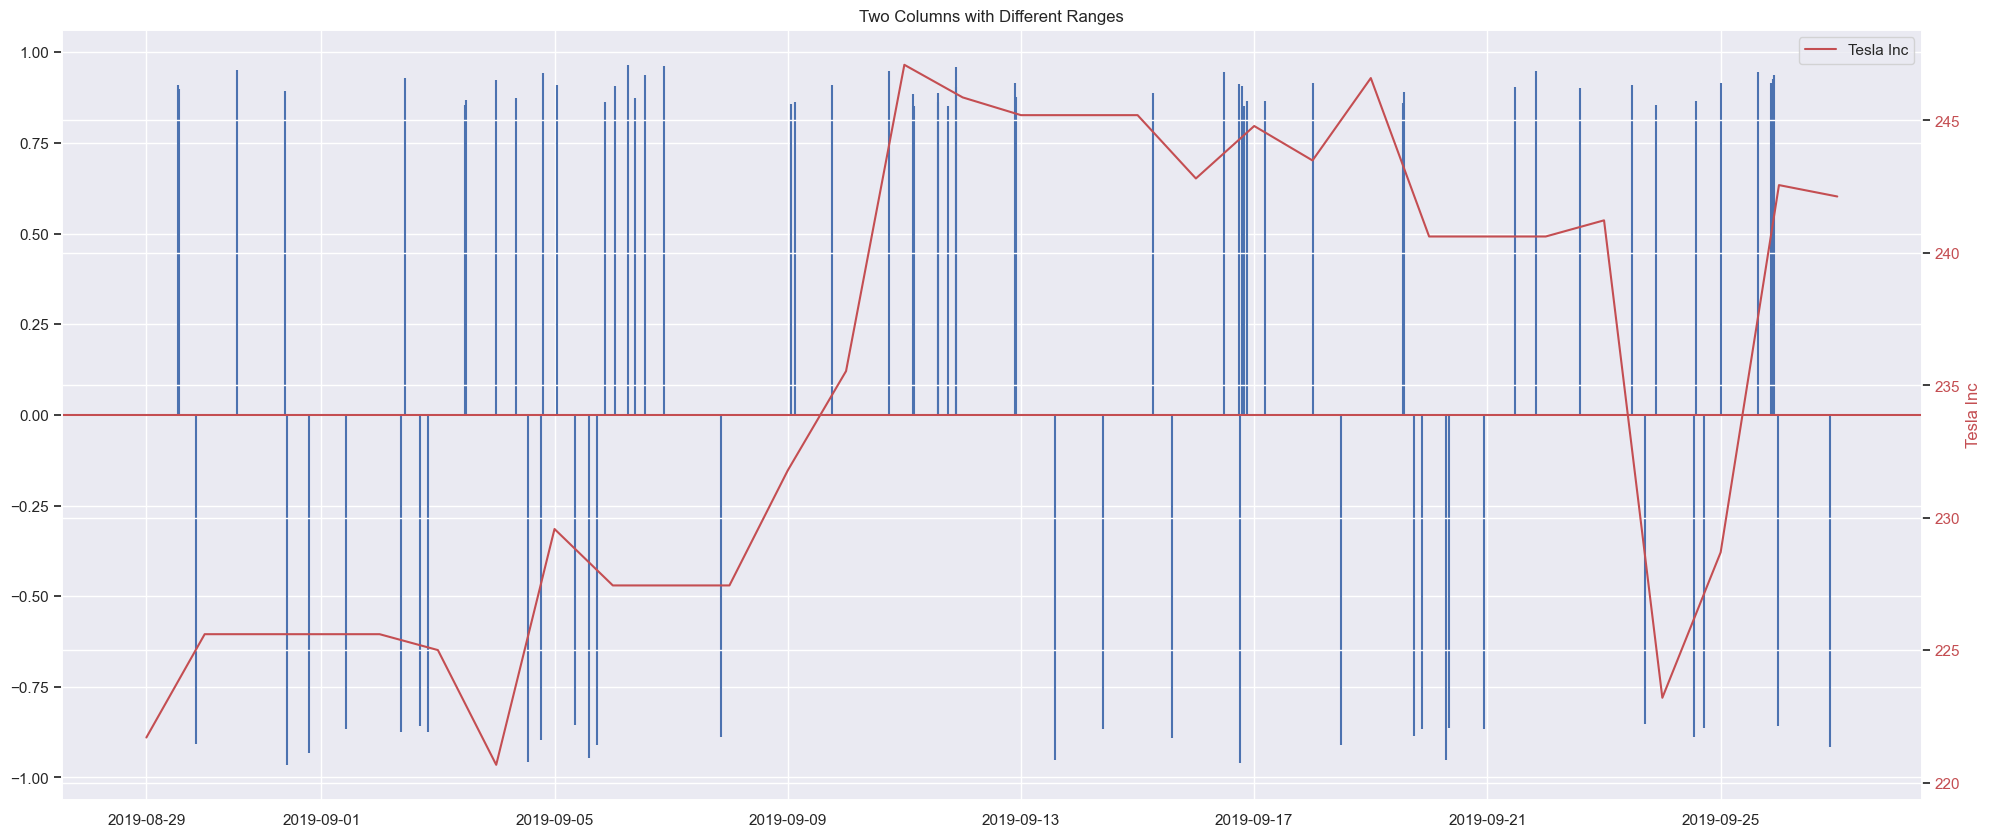

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





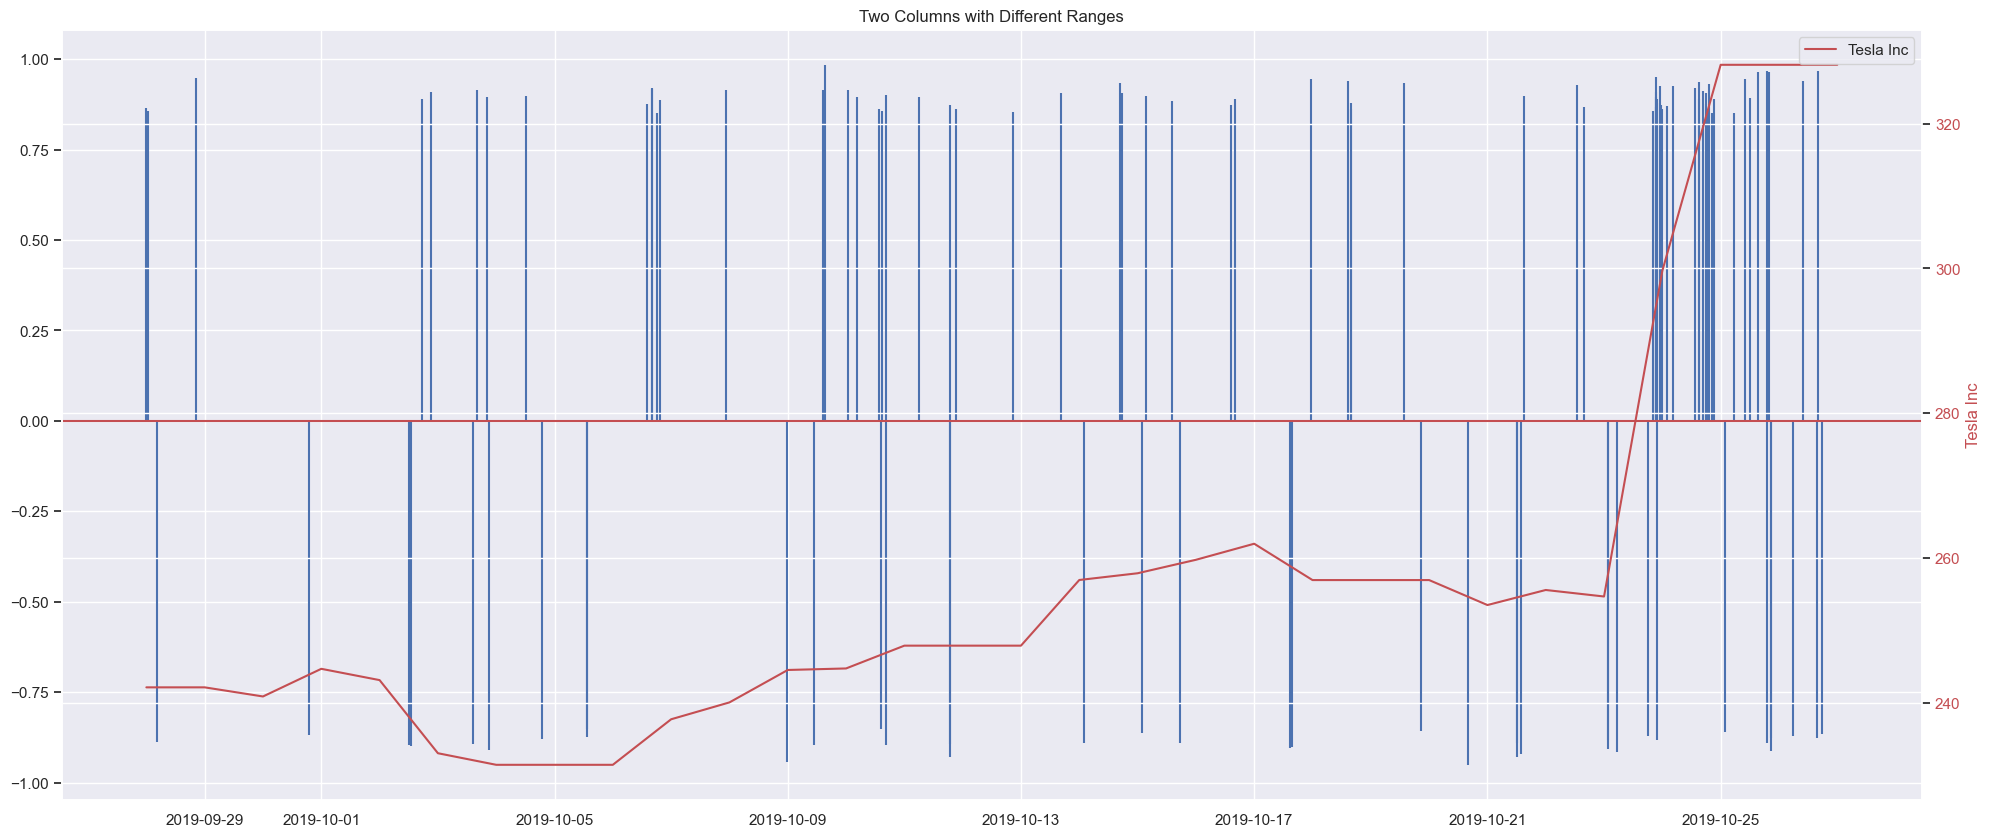

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





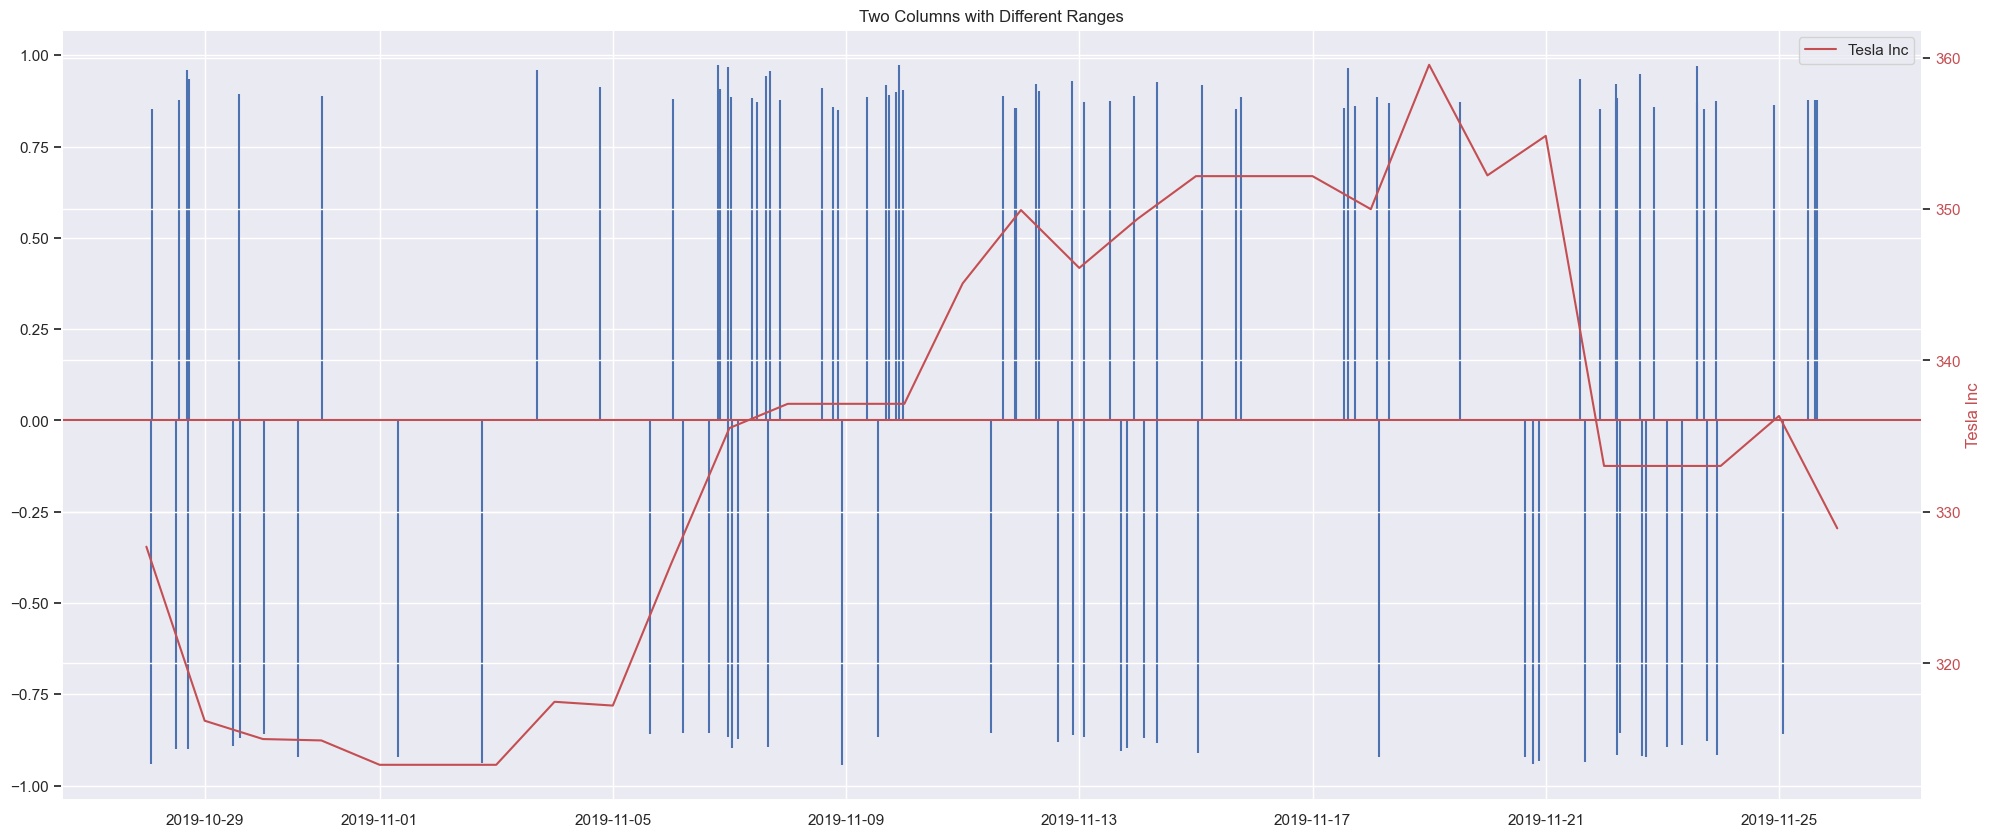

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





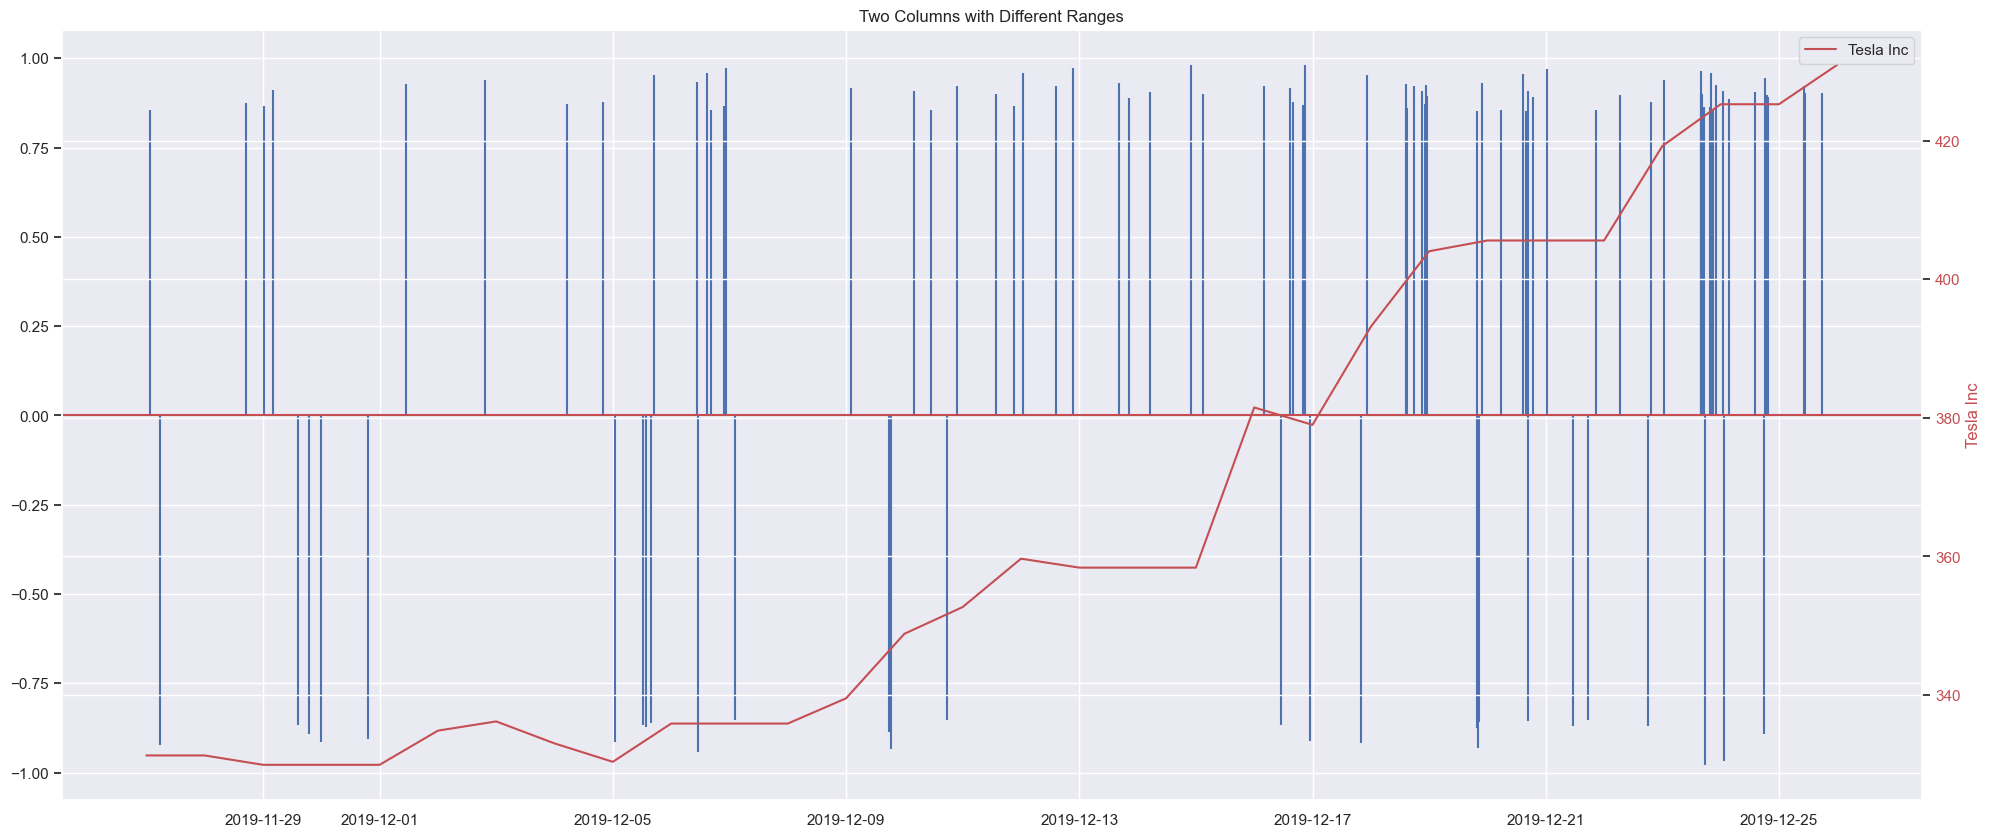

In [13]:
# Define the start and end dates
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)

# Initialize lists to store the start and end dates for every 3 months
start_dates = []
end_dates = []

# Define a timedelta of 3 months
delta = timedelta(days=30)

# Start the loop to generate dates
current_date = start_date

while current_date + delta - timedelta(days=1) <= end_date:
    # Add the current start date to the list
    start_dates.append(current_date)
    
    # Calculate the end date by adding 2 months and 30 days to the current date
    end_dates.append(current_date + delta - timedelta(days=1))
    
    # Move the current date forward by 3 months
    current_date += delta


for i in range(len(start_dates)):
    score_threshold = 0.85
    tmp_tweet_df = tweet_df[(tweet_df['vader_score_compound']<=-score_threshold) | (tweet_df['vader_score_compound']>=score_threshold)]
    draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_dates[i], end_dates[i], score_name="vader_score_compound")